<a href="https://colab.research.google.com/github/karishmasandupatla/amazon-reviews-analysis/blob/main/Amazon_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**AMAZON CUSTOMER REVIEWS DATASET**

---
###Analyzing Amazon product reviews for insights into customer sentiment, product quality, and trends using Python and pandas.

---




##**Objectives**
*   Clean and explore the reviews dataset
*   Identify sentiment and rating trends
*   Visualize product performance and customer feedback
---




##1.Data collect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the TSV file
df = pd.read_csv("/content/drive/MyDrive/work/amazon_reviews_us_Gift_Card_v1_00.tsv", sep='\t')

# Display the first few rows
print(df.head())
df.shape

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     24371595  R27ZP1F1CD0C3Y  B004LLIL5A       346014806   
1          US     42489718   RJ7RSBCHUDNNE  B004LLIKVU       473048287   
2          US       861463  R1HVYBSKLQJI5S  B00IX1I3G6       926539283   
3          US     25283295  R2HAXF0IIYQBIR  B00IX1I3G6       926539283   
4          US       397970   RNYLPX611NB7Q  B005ESMGV4       379368939   

                                       product_title product_category  \
0                      Amazon eGift Card - Celebrate        Gift Card   
1                             Amazon.com eGift Cards        Gift Card   
2                Amazon.com Gift Card Balance Reload        Gift Card   
3                Amazon.com Gift Card Balance Reload        Gift Card   
4  Amazon.com Gift Cards, Pack of 3 (Various Desi...        Gift Card   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

(77008, 15)

In [ ]:

# Convert the DataFrame to CSV
df.to_csv('amazon reviews.csv', index=False) #index=False prevents writing row indices to the file
print("CSV file saved successfully.")

CSV file saved successfully.


#2.Data Cleaning

In [ ]:
print("-"*80)
# Removing Duplicate Rows
df.drop_duplicates(inplace=True)

# Handling Missing Values
# Fill missing 'star_rating' values with the mode (most frequent value)
df['star_rating'].fillna(df['star_rating'].mode()[0], inplace=True)

# Convert 'star_rating' to integer type
df['star_rating'] = df['star_rating'].astype(int)

# Convert customer_id to integer, handling errors gracefully
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce')

# Fill missing 'customer_id' values with the mode
df['customer_id'].fillna(df['customer_id'].mode()[0], inplace=True)
df['customer_id'] = df['customer_id'].astype(int)  # Convert to integer after filling

# Convert 'verified_purchase' to string type
df['verified_purchase'] = df['verified_purchase'].astype(str)

# Fill missing 'verified_purchase' values with the mode
df['verified_purchase'].fillna(df['verified_purchase'].mode()[0], inplace=True)

# Fill missing values in 'review_headline' and 'product_id' with their respective modes
df['review_headline'].fillna(df['review_headline'].mode()[0], inplace=True)
df['product_id'].fillna(df['product_id'].mode()[0], inplace=True)


# Fill missing 'review_body' values with an empty string
df['review_body'].fillna("unknown", inplace=True)

# Convert 'review_date' to datetime objects, handling errors
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Fill missing 'review_date' values with the mode (most frequent date)
df['review_date'].fillna(df['review_date'].mode()[0], inplace=True)



#Check it contain any missing value or duplicates rows

In [ ]:
print(df.duplicated().values.any())

False


In [ ]:
print(df.isnull().values.any())

False


In [ ]:
print(df.dtypes)

marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
dtype: object


In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [ ]:
# Convert the cleaned DataFrame to a new CSV file

import pandas as pd
# Convert the cleaned DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/work/cleaned_amazon_reviews.csv', index=False)


In [ ]:
import pandas as pd
# Load the TSV file
df = pd.read_csv("/content/drive/MyDrive/work/cleaned_amazon_reviews.csv")

# Display the first few rows
print(df.head())
df.shape

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     24371595  R27ZP1F1CD0C3Y  B004LLIL5A       346014806   
1          US     42489718   RJ7RSBCHUDNNE  B004LLIKVU       473048287   
2          US       861463  R1HVYBSKLQJI5S  B00IX1I3G6       926539283   
3          US     25283295  R2HAXF0IIYQBIR  B00IX1I3G6       926539283   
4          US       397970   RNYLPX611NB7Q  B005ESMGV4       379368939   

                                       product_title product_category  \
0                      Amazon eGift Card - Celebrate        Gift Card   
1                             Amazon.com eGift Cards        Gift Card   
2                Amazon.com Gift Card Balance Reload        Gift Card   
3                Amazon.com Gift Card Balance Reload        Gift Card   
4  Amazon.com Gift Cards, Pack of 3 (Various Desi...        Gift Card   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

(77008, 15)

In [ ]:
print(df.duplicated().values.any())

False


In [ ]:
print(df.isnull().values.any())

False


In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

#Finally cleaned data we have

##3.Data Visualization

##frequency of star_rating

In [ ]:
# Calculate the total number of unique star ratings
total_unique_star_ratings = df['star_rating'].nunique()

# Print the result
print(f"Total unique star ratings: {total_unique_star_ratings}")

Total unique star ratings: 5


In [ ]:
# Calculate the counts of each unique star rating
star_rating_counts = df['star_rating'].value_counts()

# Print the results
star_rating_counts

star_rating
5    68241
4     4667
1     2154
3     1360
2      586
Name: count, dtype: int64

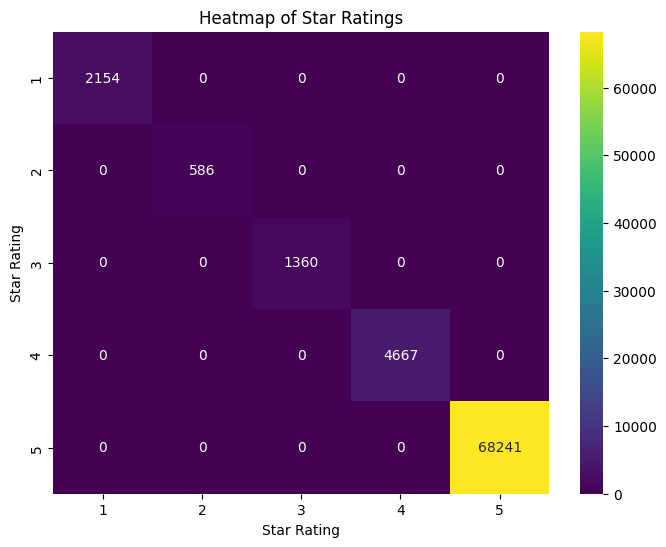

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['star_rating'], df['star_rating']), annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Star Rating')
plt.show()


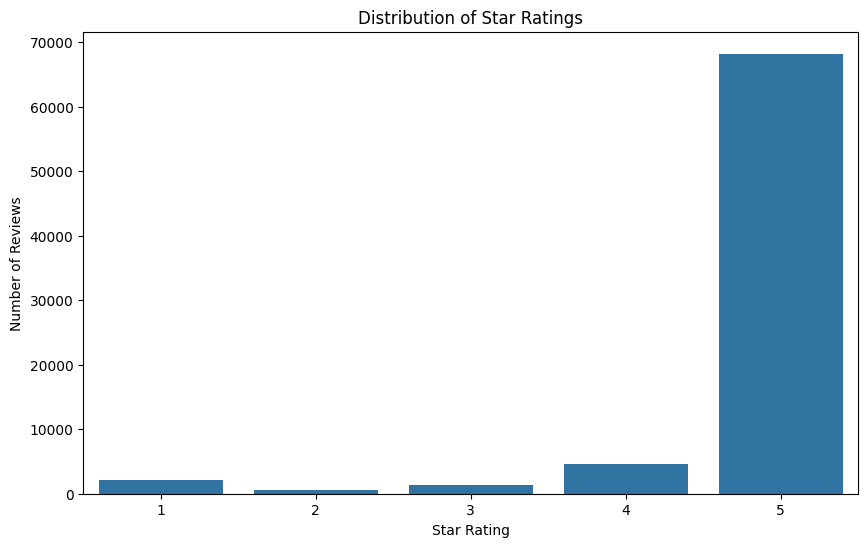

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='star_rating', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

#Gifts cards

In [ ]:

# Count unique product titles
unique_product_titles = df["product_title"].nunique()
print("Number of unique product titles:", unique_product_titles)

# Count occurrences of each product title
product_counts = df["product_title"].value_counts()
print(product_counts)


Number of unique product titles: 999
product_title
Amazon.com eGift Cards                                                      26187
Amazon eGift Card - Happy Birthday (Candles)                                 4775
Amazon.com Gift Card Balance Reload                                          4284
Amazon.com Gift Card in a Greeting Card (Various Designs)                    2708
Amazon.com Gift Cards - Print at Home                                        1352
                                                                            ...  
Amazon Gift Card - Email - New Year's (Love in a Gift Card) [Someecards]        1
Amazon Gift Card - Facebook - Loving Giraffes                                   1
Amazon Gift Card - Facebook - Queen for a Day                                   1
Amazon Video Gift Card - Facebook - Crazy Birthday Song                         1
Amazon Gift Card - Facebook - Love Birds                                        1
Name: count, Length: 999, dtype: int64


In [ ]:
# Basic info
print(df.info())

# First few rows
print(df.head())

# Check missing values
print(df.isnull().sum())

# Summary of numerical columns
print(df.describe())

# Count of unique values in categorical columns
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77008 entries, 0 to 77007
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        77008 non-null  object
 1   customer_id        77008 non-null  int64 
 2   review_id          77008 non-null  object
 3   product_id         77008 non-null  object
 4   product_parent     77008 non-null  int64 
 5   product_title      77008 non-null  object
 6   product_category   77008 non-null  object
 7   star_rating        77008 non-null  int64 
 8   helpful_votes      77008 non-null  int64 
 9   total_votes        77008 non-null  int64 
 10  vine               77008 non-null  object
 11  verified_purchase  77008 non-null  object
 12  review_headline    77004 non-null  object
 13  review_body        77001 non-null  object
 14  review_date        77006 non-null  object
dtypes: int64(5), object(10)
memory usage: 8.8+ MB
None
  marketplace  customer_id       rev

##Make column category separate one for add  cards

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/work/amazon_reviews_us_Gift_Card_v1_00.csv")

# Define category mapping based on keywords
category_mapping = {
    "Birthday": ["birthday"],
    "Christmas": ["christmas", "xmas"],
    "Father's Day": ["father"],
    "Mother's Day": ["mother"],
    "Wedding": ["wedding"],
    "Anniversary": ["anniversary"],
    "Valentine's Day": ["valentine"],
    "Graduation": ["graduation"],
    "Thank You": ["thank"],
    "Baby Shower": ["baby", "shower"],
    "Halloween": ["halloween"],
    "Easter": ["easter"],
    "New Year": ["new year"],
    "Congratulations": ["congratulation"],
    "Retirement": ["retirement"],
    "Friendship": ["friend"],
    "Love": ["love"],
    "Corporate": ["business", "corporate"],
    "Get Well Soon": ["get well", "recovery"],
    "Other": []  # Default category
}

# Function to categorize product titles
def categorize_product(title):
    title_lower = str(title).lower()
    for category, keywords in category_mapping.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    return "Other"  # Default if no category is matched

# Apply the categorization function to update the category column
df["category"] = df["product_title"].apply(categorize_product)

# Save the updated dataset
df.to_csv("updated_amazon_reviews.csv", index=False)

# Display first 20 rows of updated category column
print(df[["product_title", "category"]].head(20))


                                        product_title   category
0                       Amazon eGift Card - Celebrate      Other
1                              Amazon.com eGift Cards      Other
2                 Amazon.com Gift Card Balance Reload      Other
3                 Amazon.com Gift Card Balance Reload      Other
4   Amazon.com Gift Cards, Pack of 3 (Various Desi...      Other
5   Amazon Gift Card - Print - Happy Birthday (Birds)   Birthday
6                              Amazon.com eGift Cards      Other
7   Amazon.com Gift Card in a Greeting Card (Vario...      Other
8                              Amazon.com eGift Cards      Other
9             Amazon Gift Card - Print - Amazon Boxes      Other
10                             Amazon.com eGift Cards      Other
11  Amazon Gift Card - Print - Happy Birthday (Birds)   Birthday
12                             Amazon.com eGift Cards      Other
13                             Amazon.com eGift Cards      Other
14  Amazon eGift Card - H

##Here main graphs of gift cards

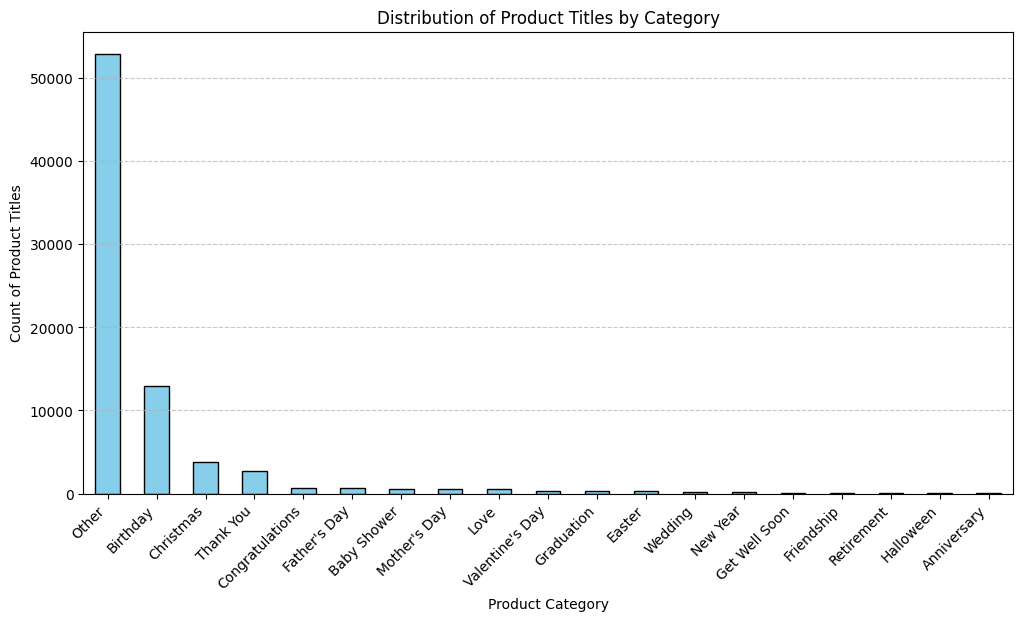

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")  # Use the updated file with categories

# Count the occurrences of each category
category_counts = df["category"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the plot
plt.xlabel("Product Category")
plt.ylabel("Count of Product Titles")
plt.title("Distribution of Product Titles by Category")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

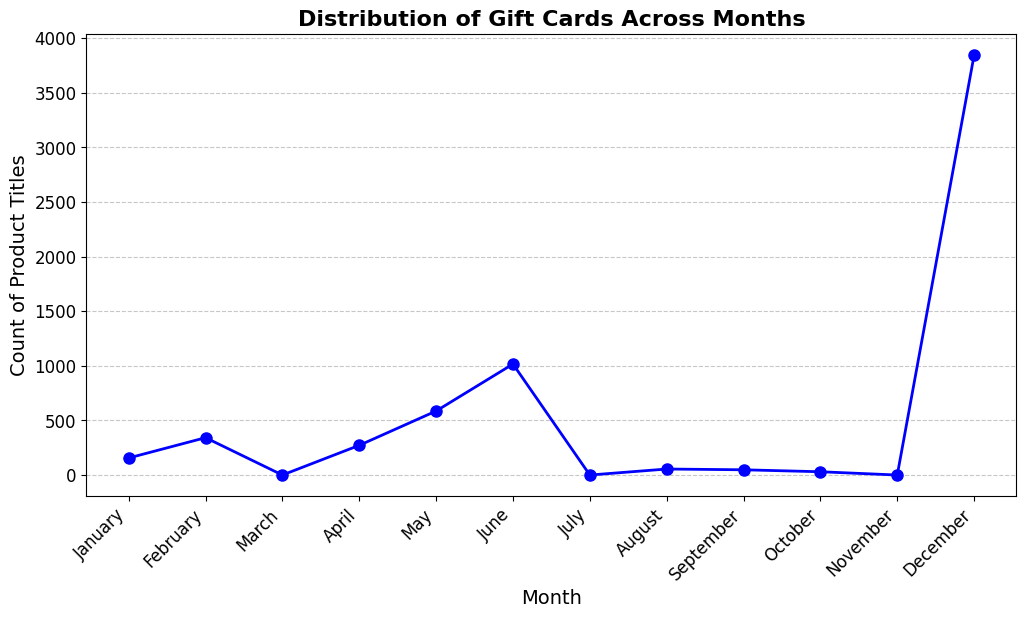

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")  # Ensure it has updated categories

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Function to assign months based on category
def assign_month(category):
    for month, categories in month_category_mapping.items():
        if category in categories:
            return month
    return "Other"  # Default if no match

# Apply month assignment
df["month"] = df["category"].apply(assign_month)

# Count product occurrences per month
month_counts = df.groupby("month")["category"].count().reindex(month_category_mapping.keys(), fill_value=0)

# **Plot Line Graph: Distribution of Gift Cards by Month**
plt.figure(figsize=(12, 6))
plt.plot(month_counts.index, month_counts.values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Customize the plot
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count of Product Titles", fontsize=14)
plt.title("Distribution of Gift Cards Across Months", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


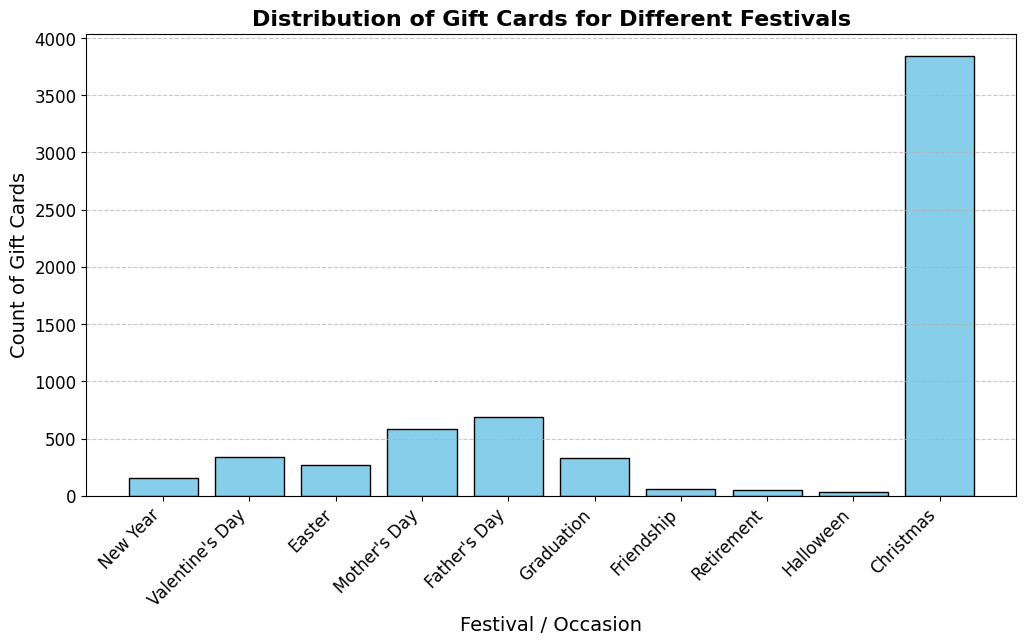

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")  # Ensure it has updated categories

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Count occurrences of each festival category
festival_counts = df.groupby(["month", "category"])["product_title"].count().reset_index()

# Sort data by month order
festival_counts["month"] = pd.Categorical(festival_counts["month"], categories=month_category_mapping.keys(), ordered=True)
festival_counts = festival_counts.sort_values("month")

# **Plot Bar Graph: Festivals and Their Gift Cards**
plt.figure(figsize=(12, 6))
plt.bar(festival_counts["category"], festival_counts["product_title"], color="skyblue", edgecolor="black")

# Customize the plot
plt.xlabel("Festival / Occasion", fontsize=14)
plt.ylabel("Count of Gift Cards", fontsize=14)
plt.title("Distribution of Gift Cards for Different Festivals", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


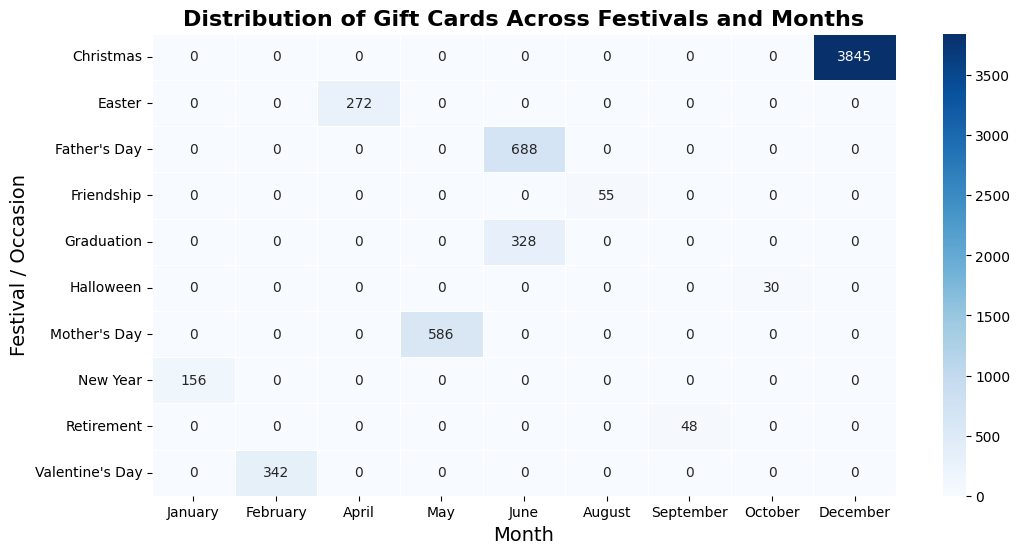

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")  # Ensure it has updated categories

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Count occurrences of each festival category per month
festival_counts = df.groupby(["month", "category"])["product_title"].count().reset_index()

# Sort data by month order
festival_counts["month"] = pd.Categorical(festival_counts["month"], categories=month_category_mapping.keys(), ordered=True)
festival_counts = festival_counts.sort_values("month")

# **Plot Heatmap (X = Month, Y = Festival, Color Intensity = Gift Card Count)**
plt.figure(figsize=(12, 6))
heatmap_data = festival_counts.pivot(index="category", columns="month", values="product_title").fillna(0)

sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Customize the plot
plt.xlabel("Month", fontsize=14)
plt.ylabel("Festival / Occasion", fontsize=14)
plt.title("Distribution of Gift Cards Across Festivals and Months", fontsize=16, fontweight="bold")

# Show the plot
plt.show()


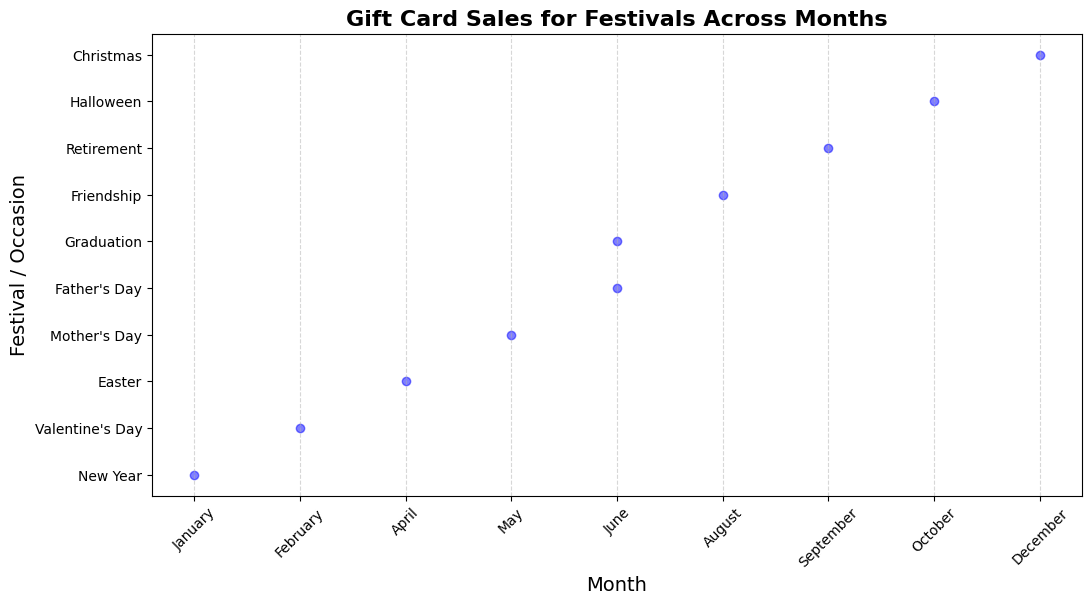

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(festival_counts["month"], festival_counts["category"], marker="o", color="blue", alpha=0.5)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Festival / Occasion", fontsize=14)
plt.title("Gift Card Sales for Festivals Across Months", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

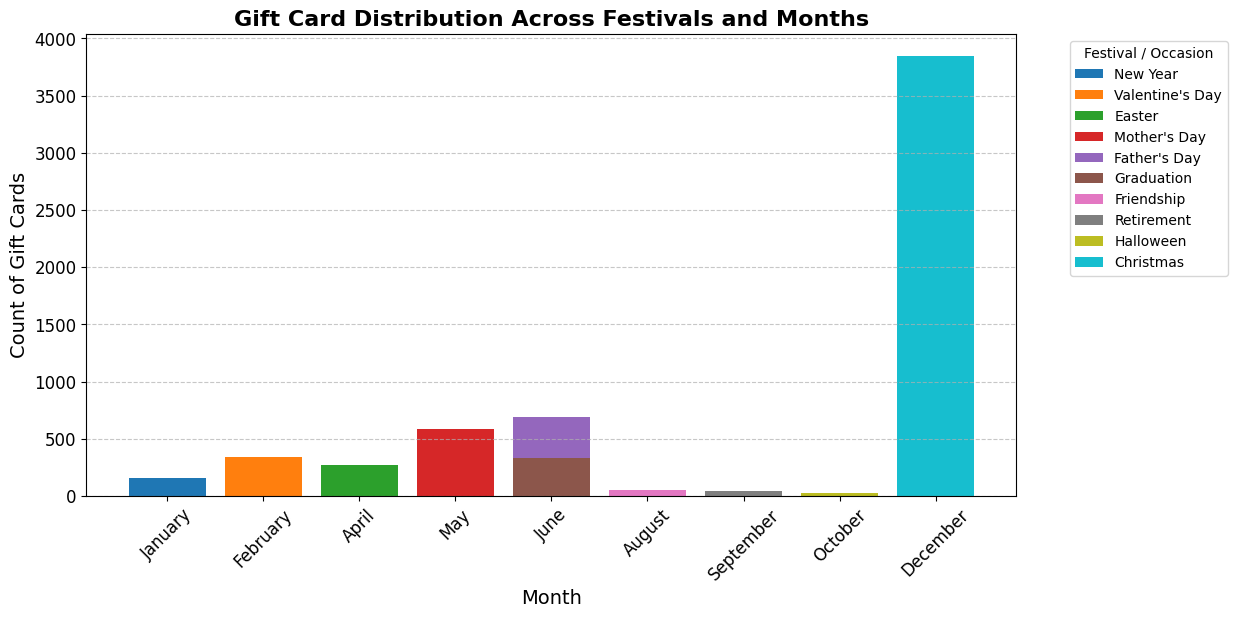

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")  # Ensure it has updated categories

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Count occurrences of each festival category per month
festival_counts = df.groupby(["month", "category"])["product_title"].count().reset_index()

# Sort data by month order
festival_counts["month"] = pd.Categorical(festival_counts["month"], categories=month_category_mapping.keys(), ordered=True)
festival_counts = festival_counts.sort_values("month")

# **Plot Bar Chart (X = Month, Y = Festival, Bar Height = Count)**
plt.figure(figsize=(12, 6))

# Create bars for each festival in its respective month
for category in festival_counts["category"].unique():
    subset = festival_counts[festival_counts["category"] == category]
    plt.bar(subset["month"], subset["product_title"], label=category)

# Customize the plot
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count of Gift Cards", fontsize=14)
plt.title("Gift Card Distribution Across Festivals and Months", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Festival / Occasion", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside the chart
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


#sub categories of cards

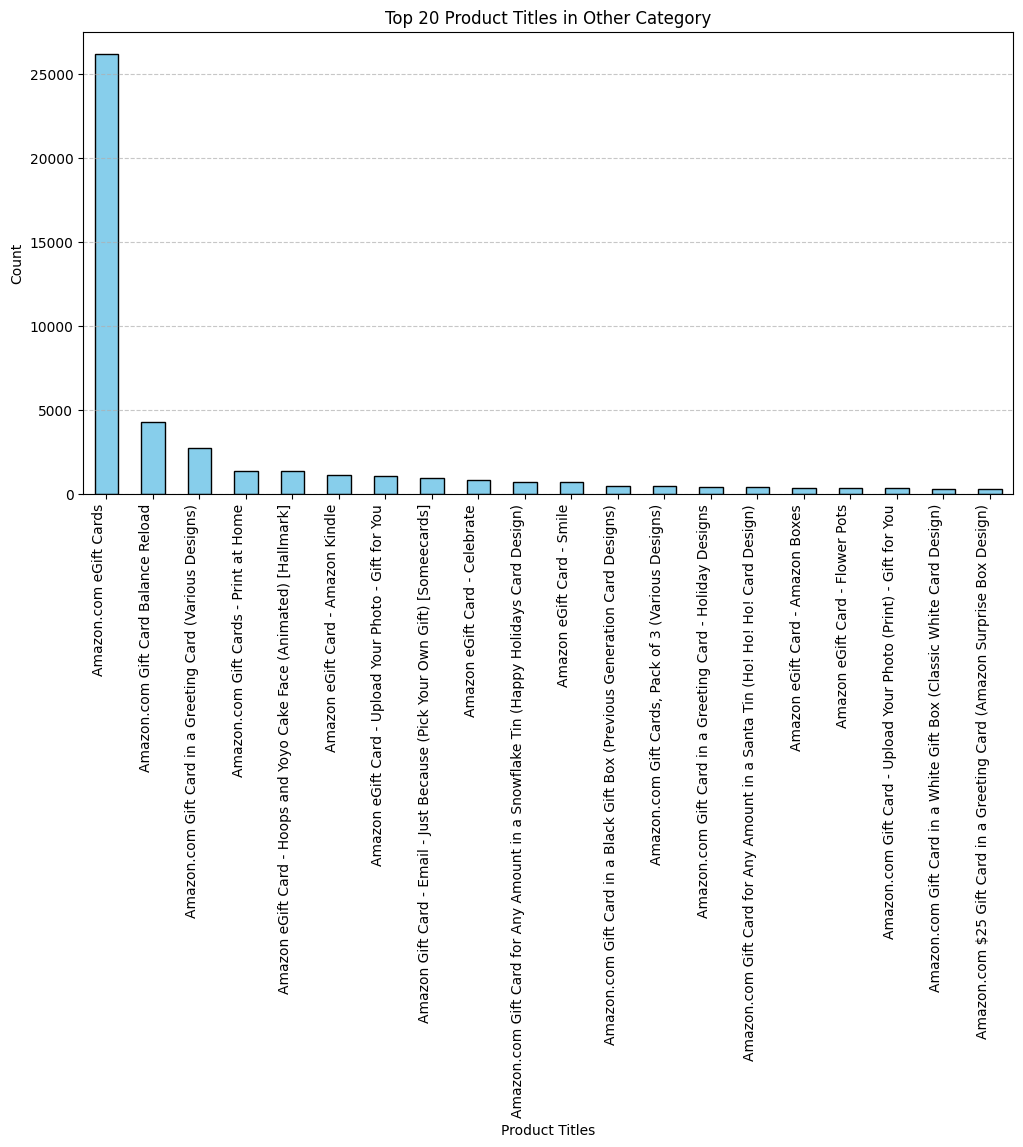

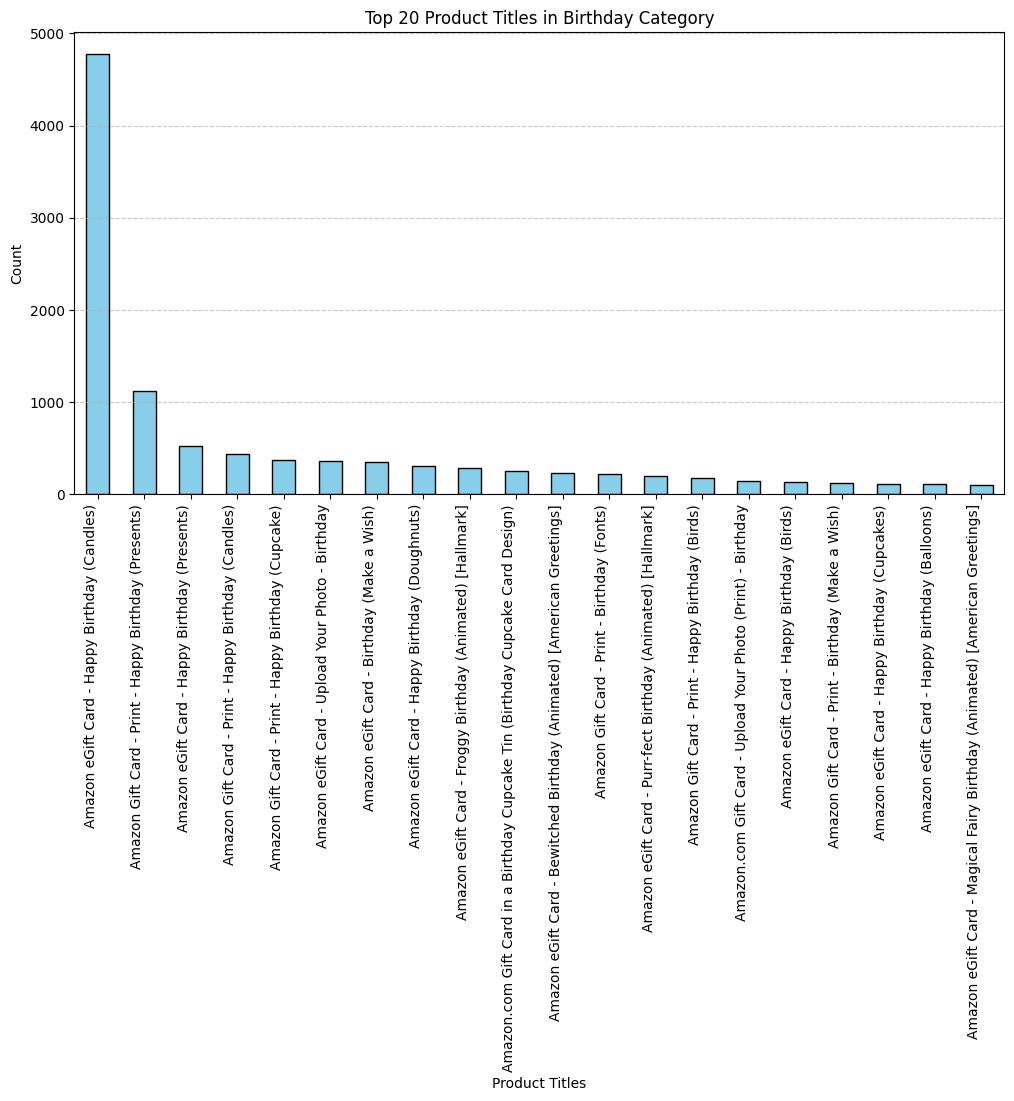

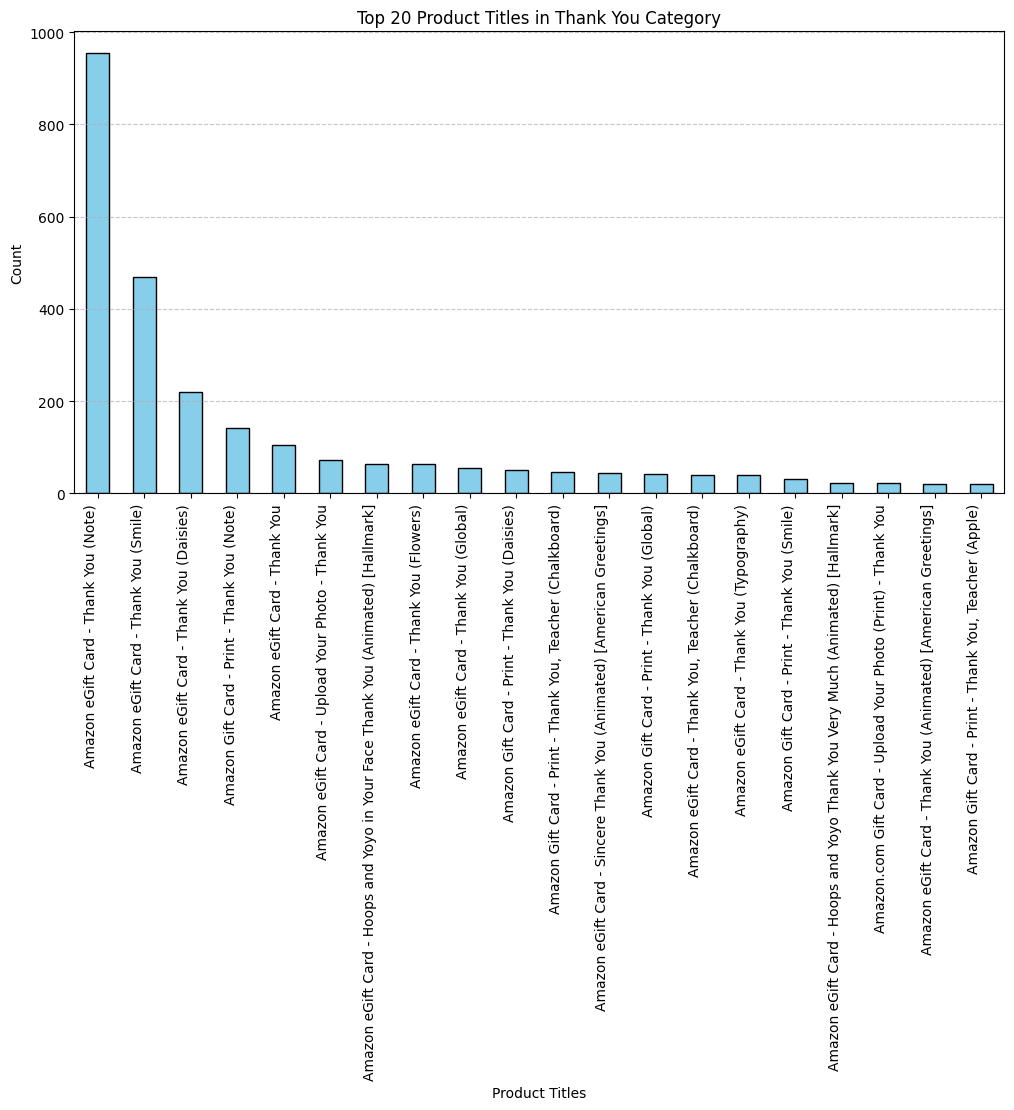

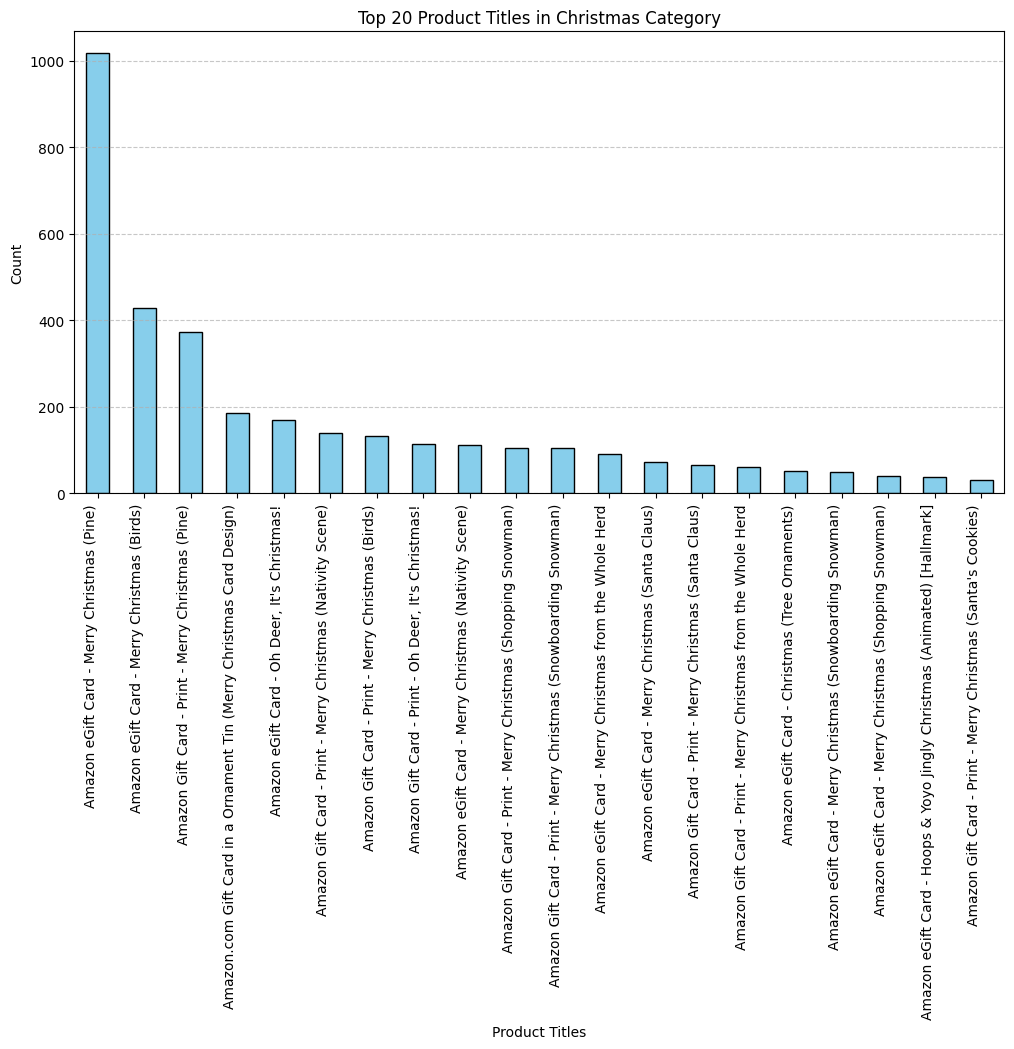

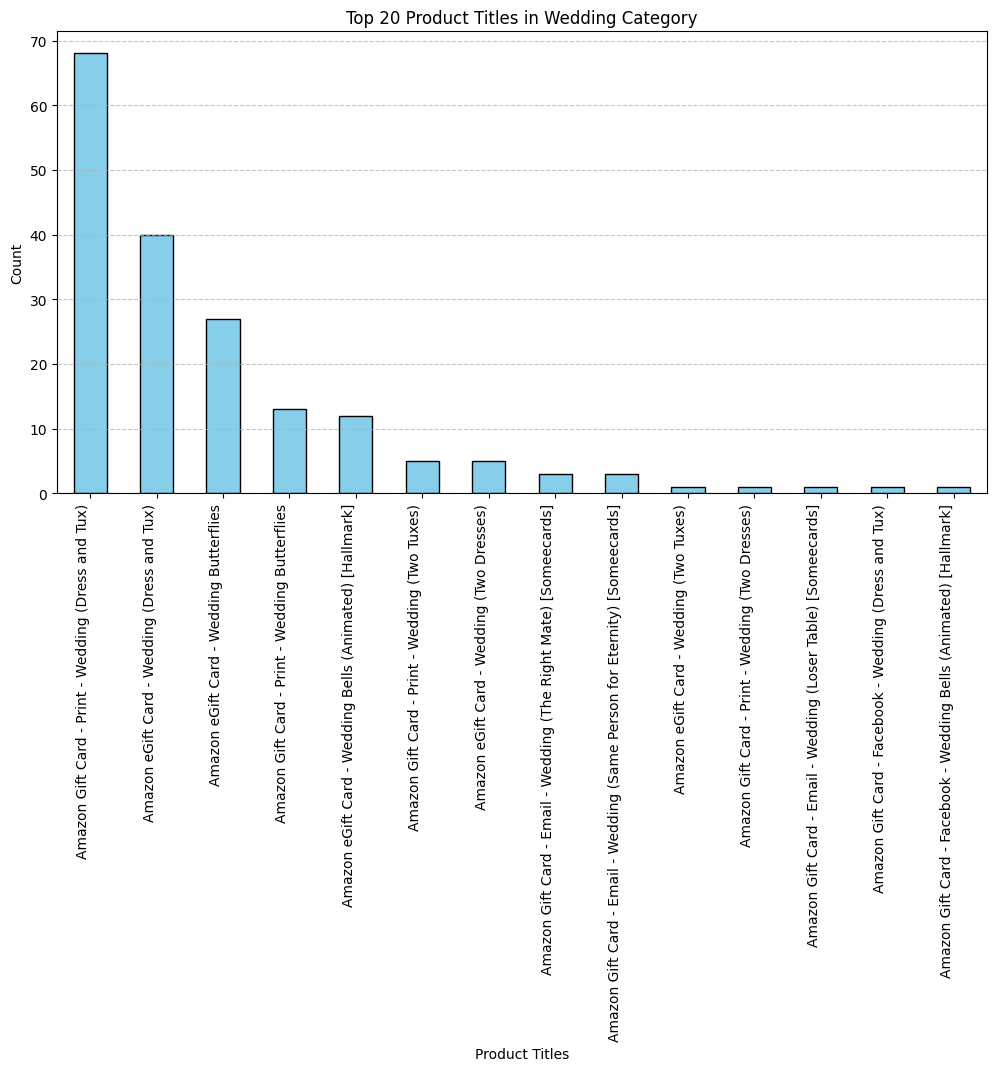

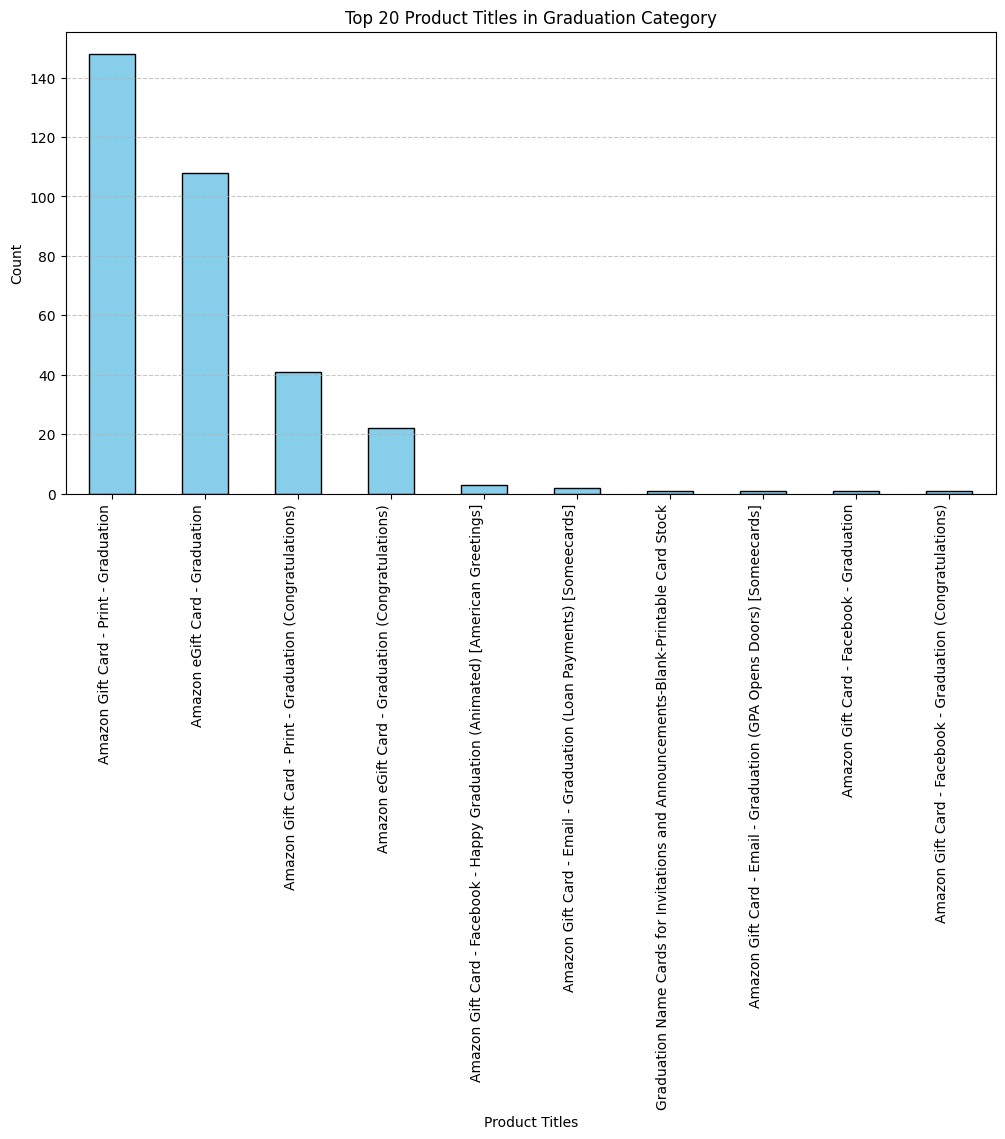

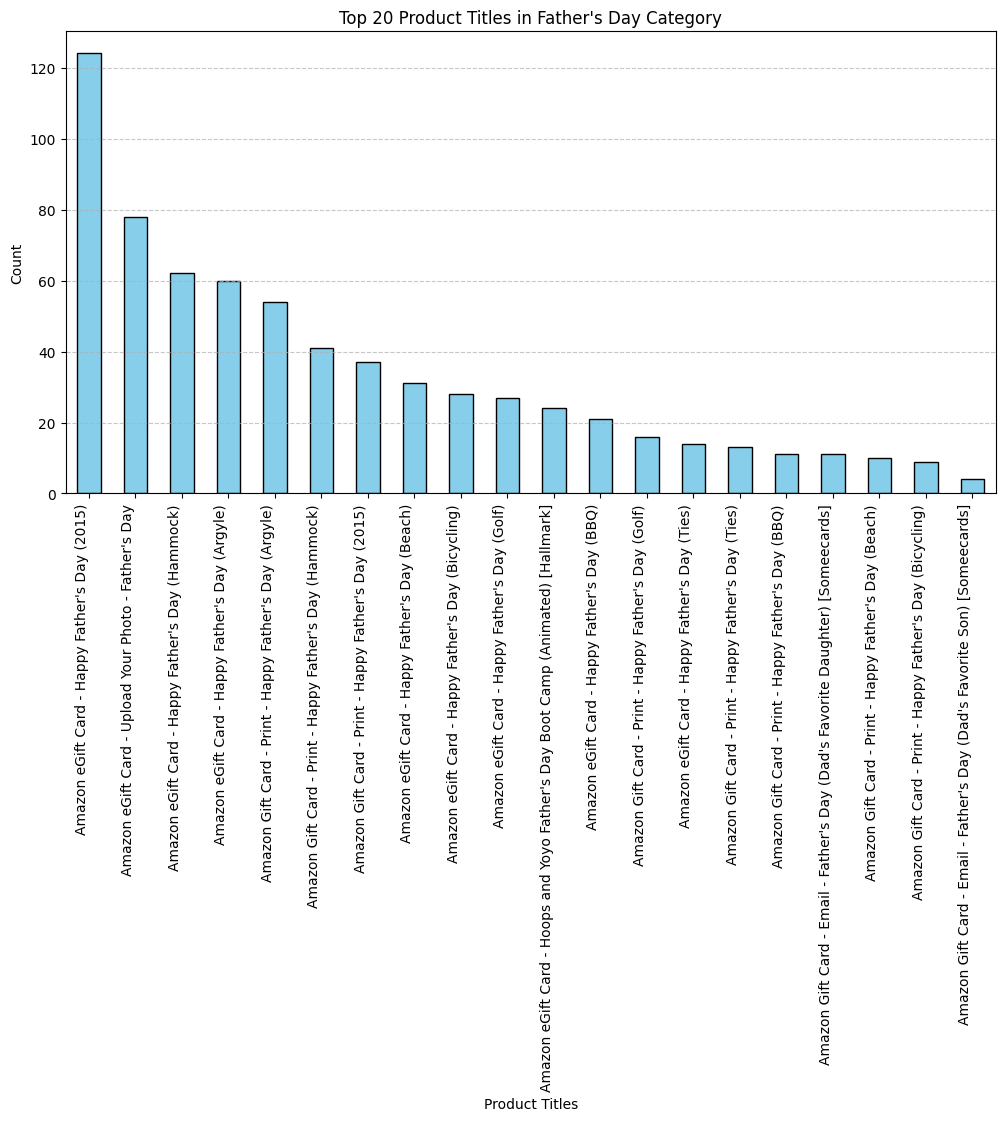

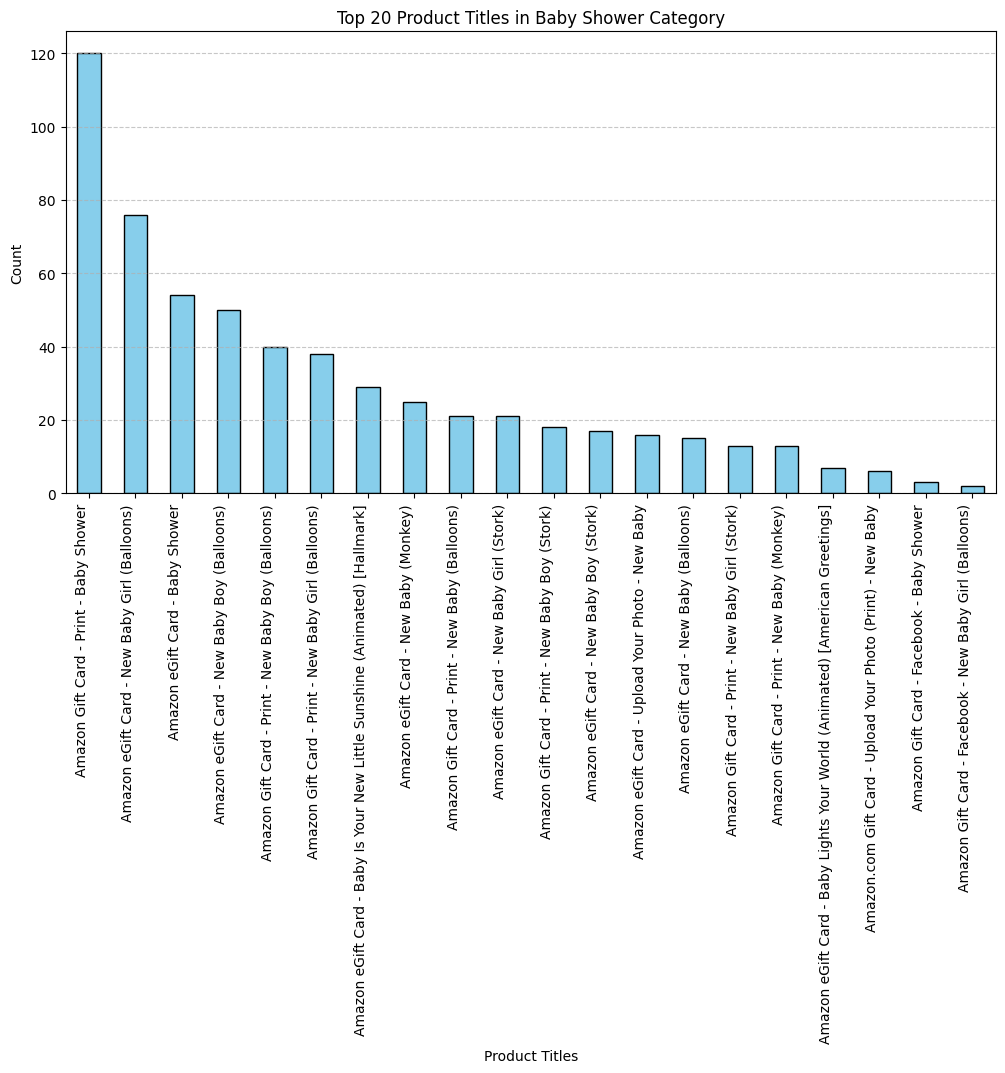

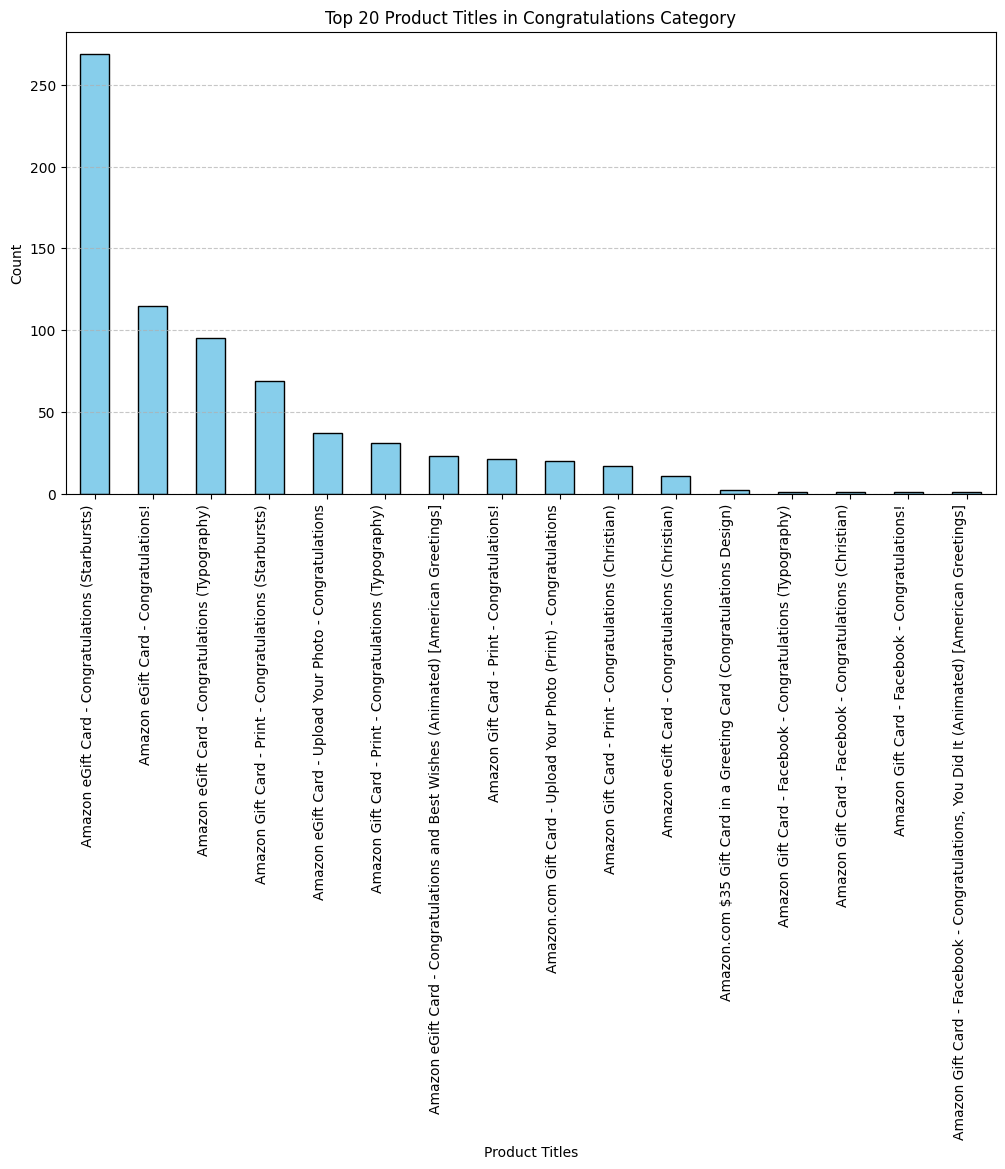

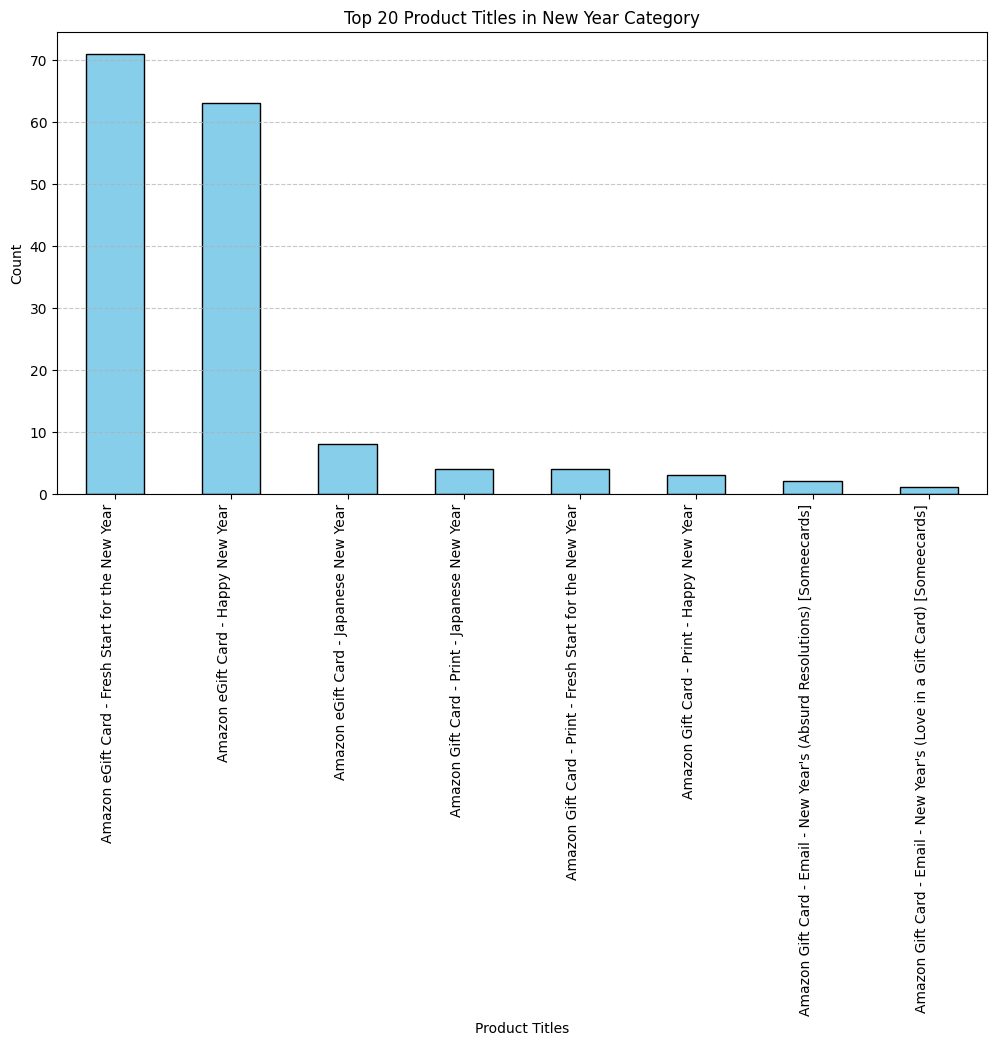

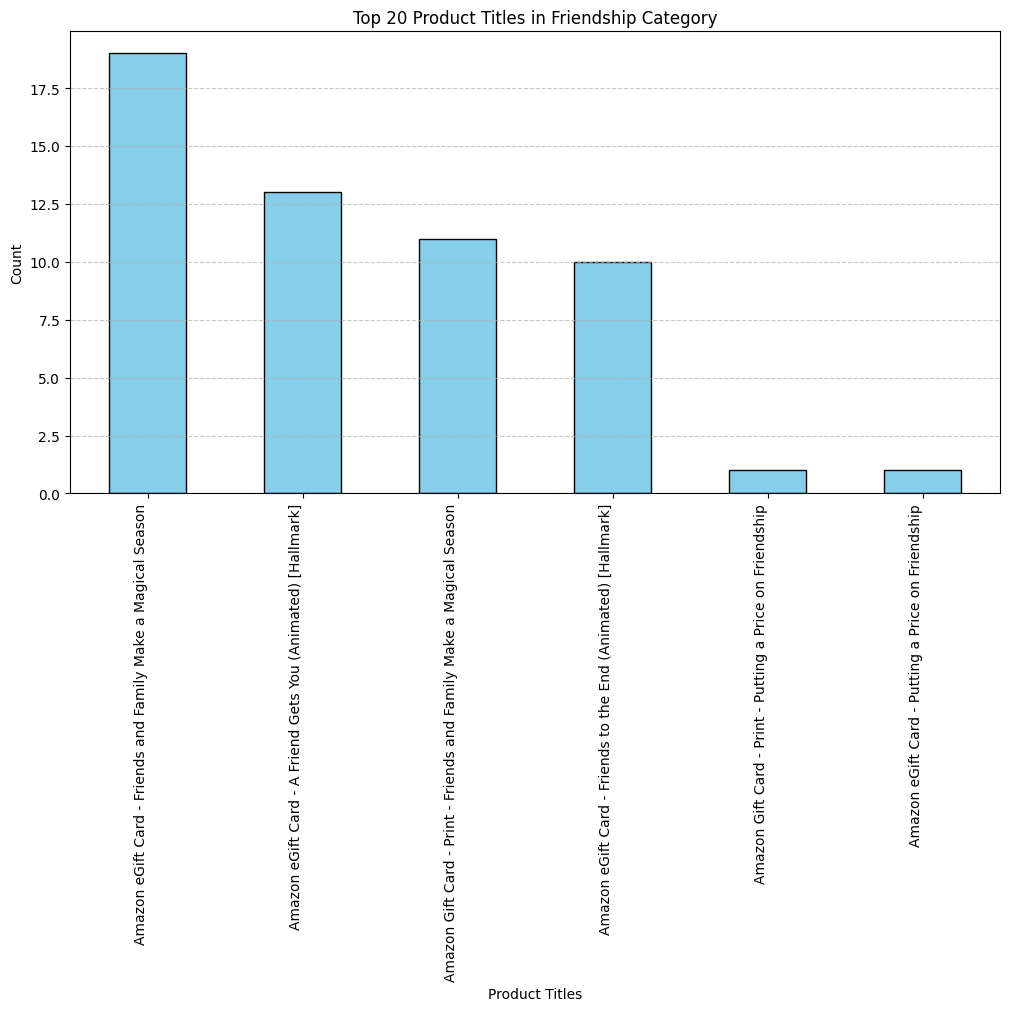

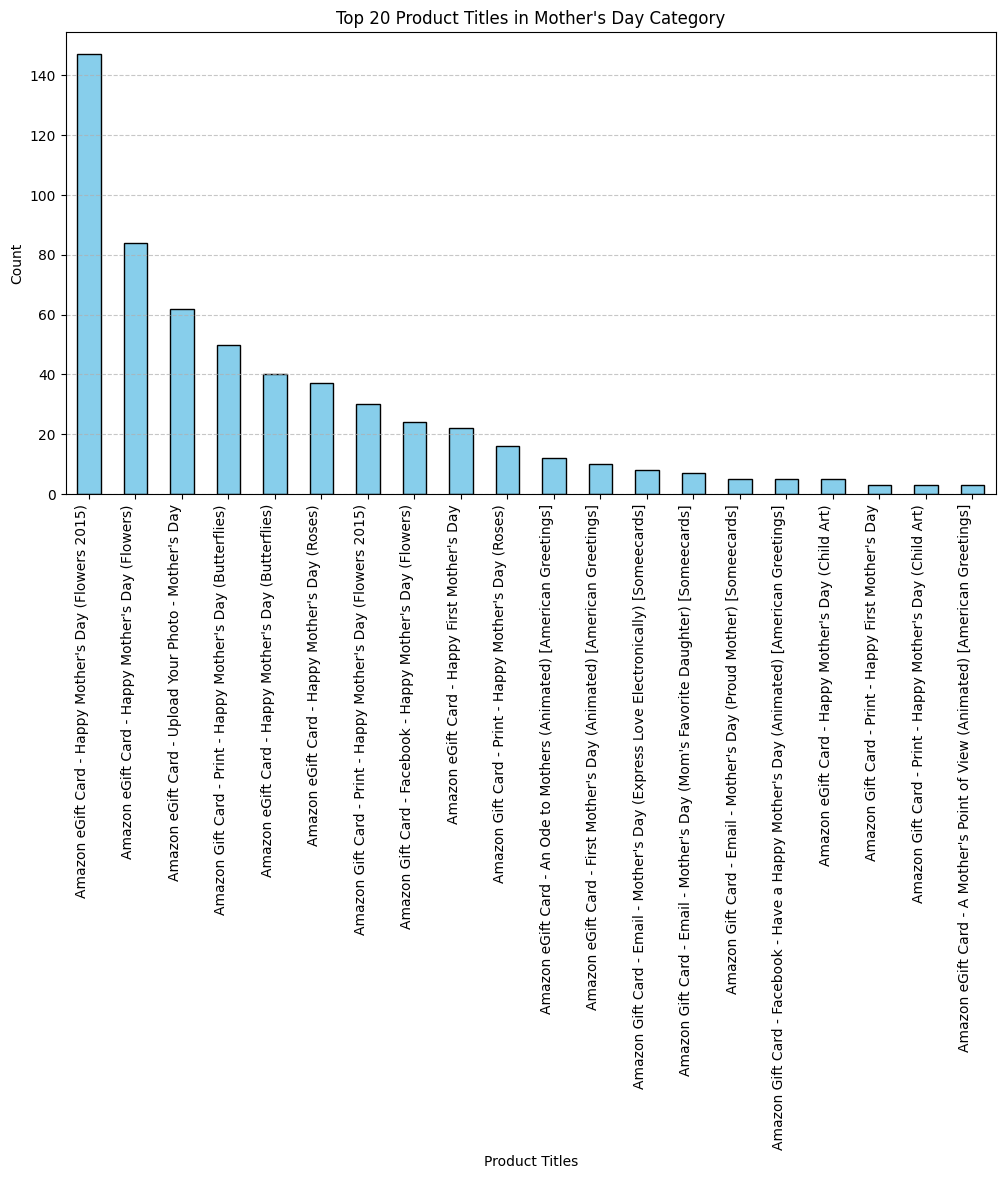

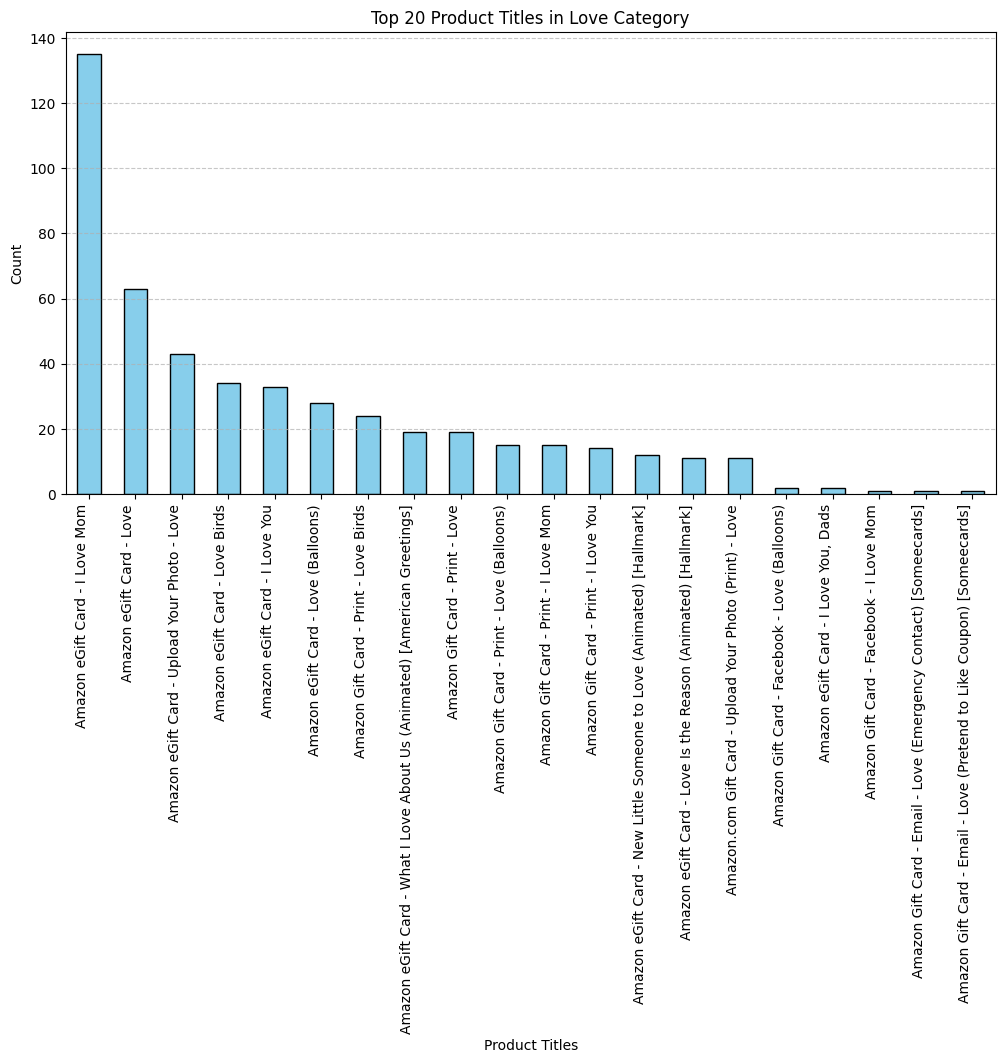

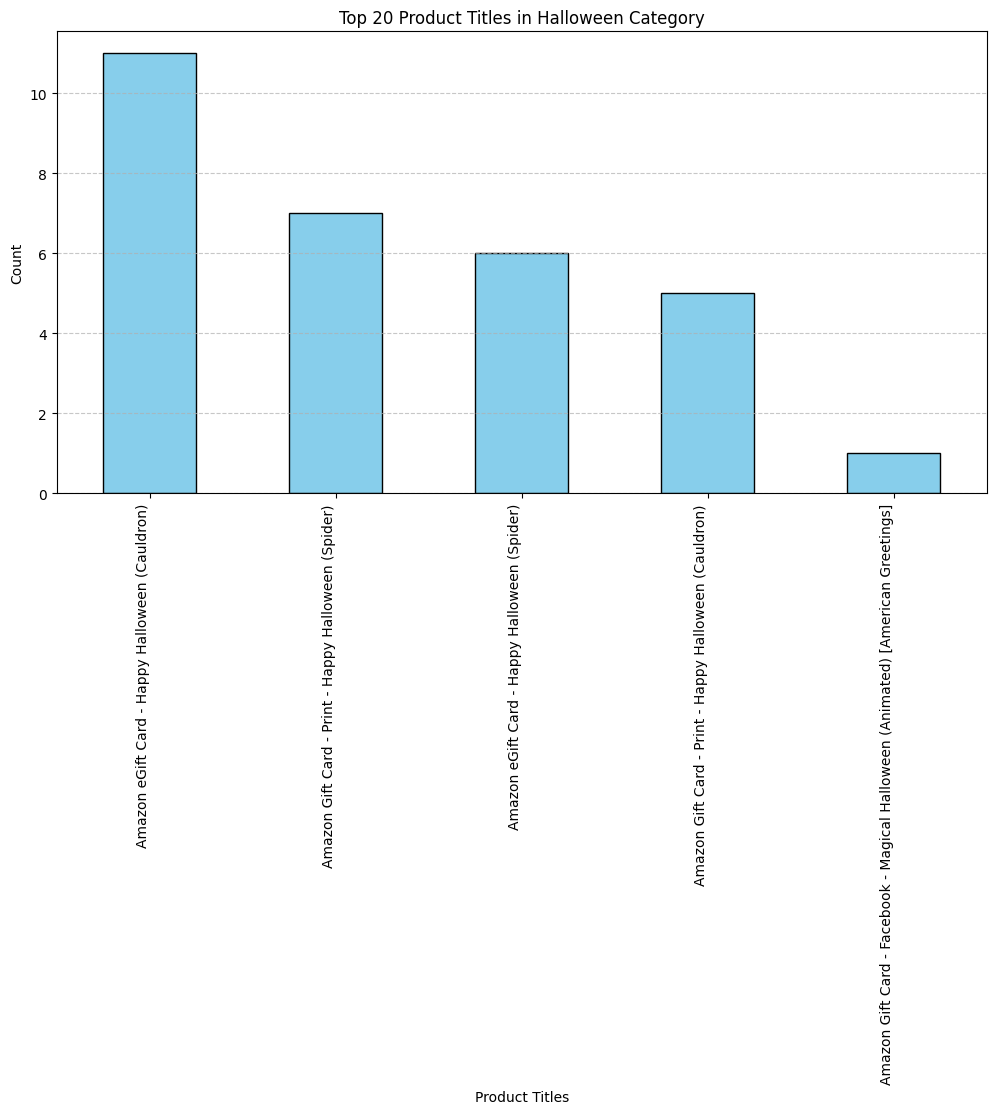

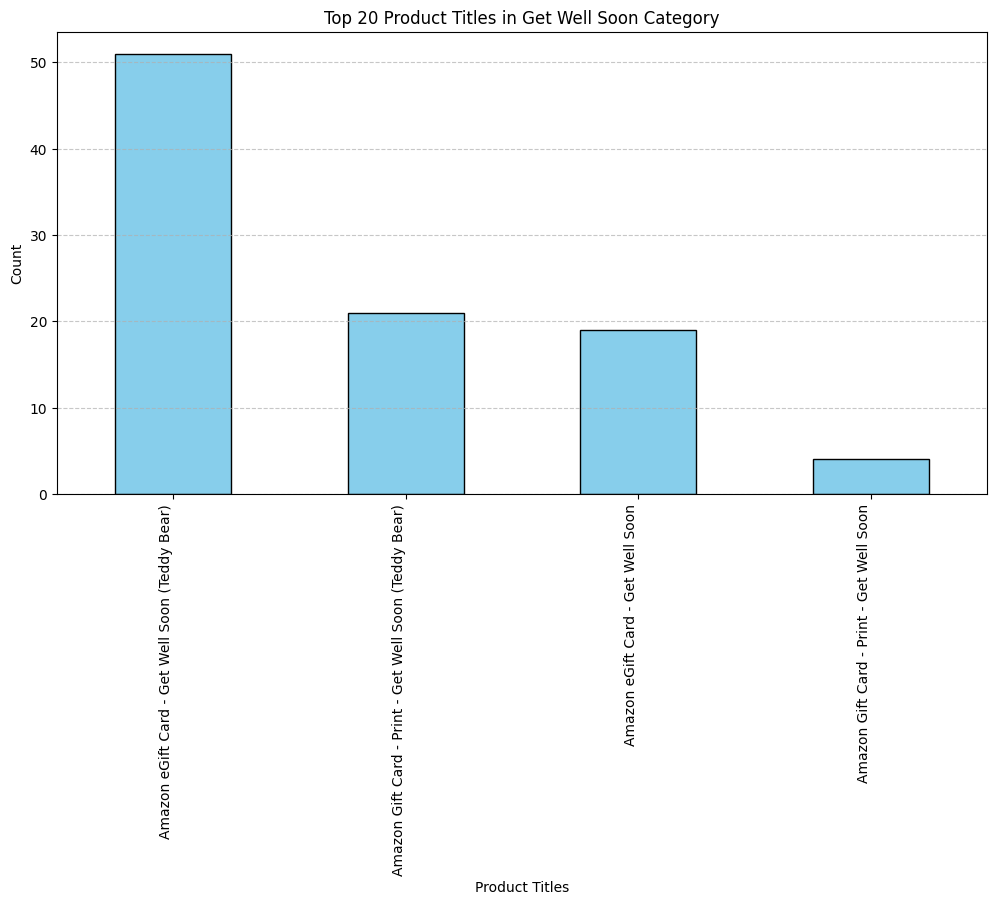

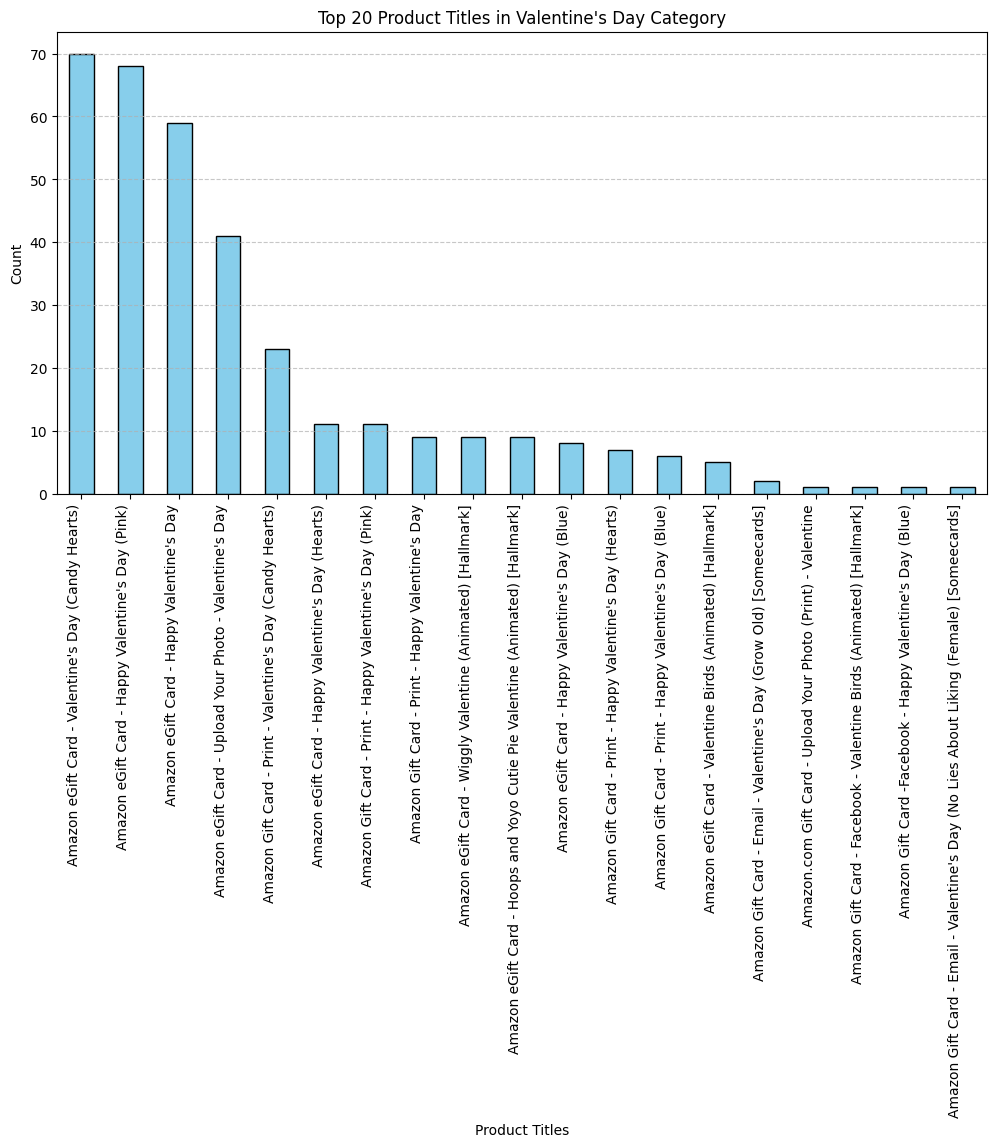

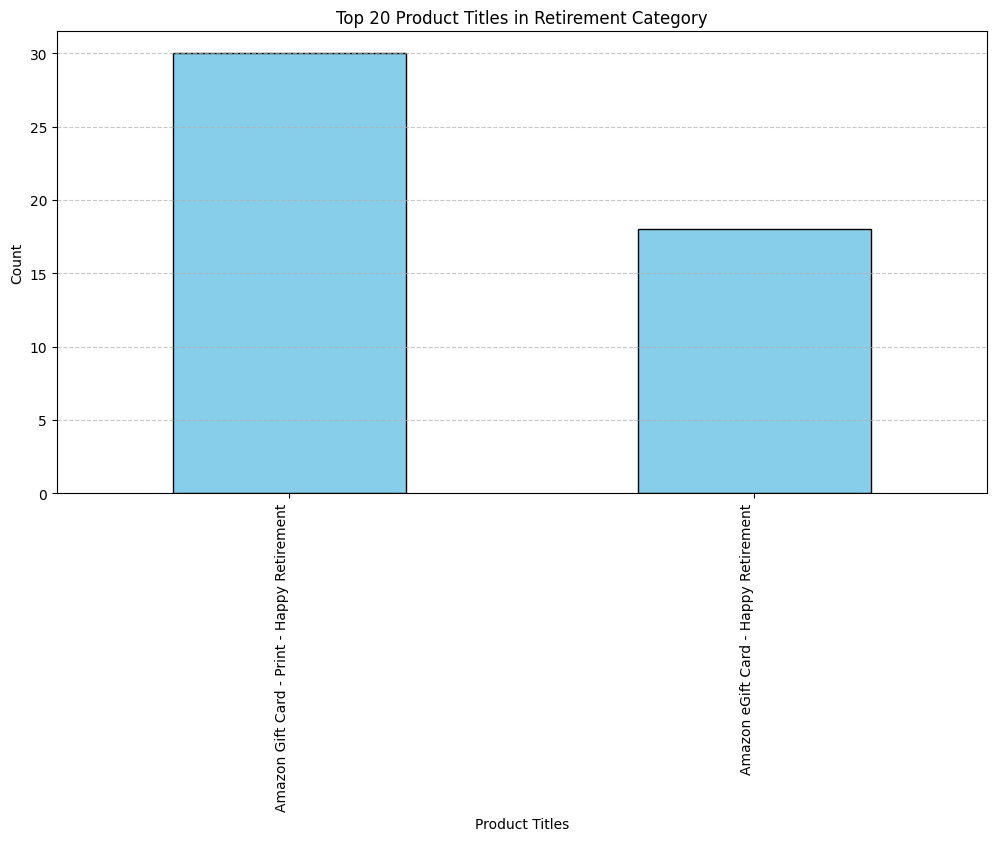

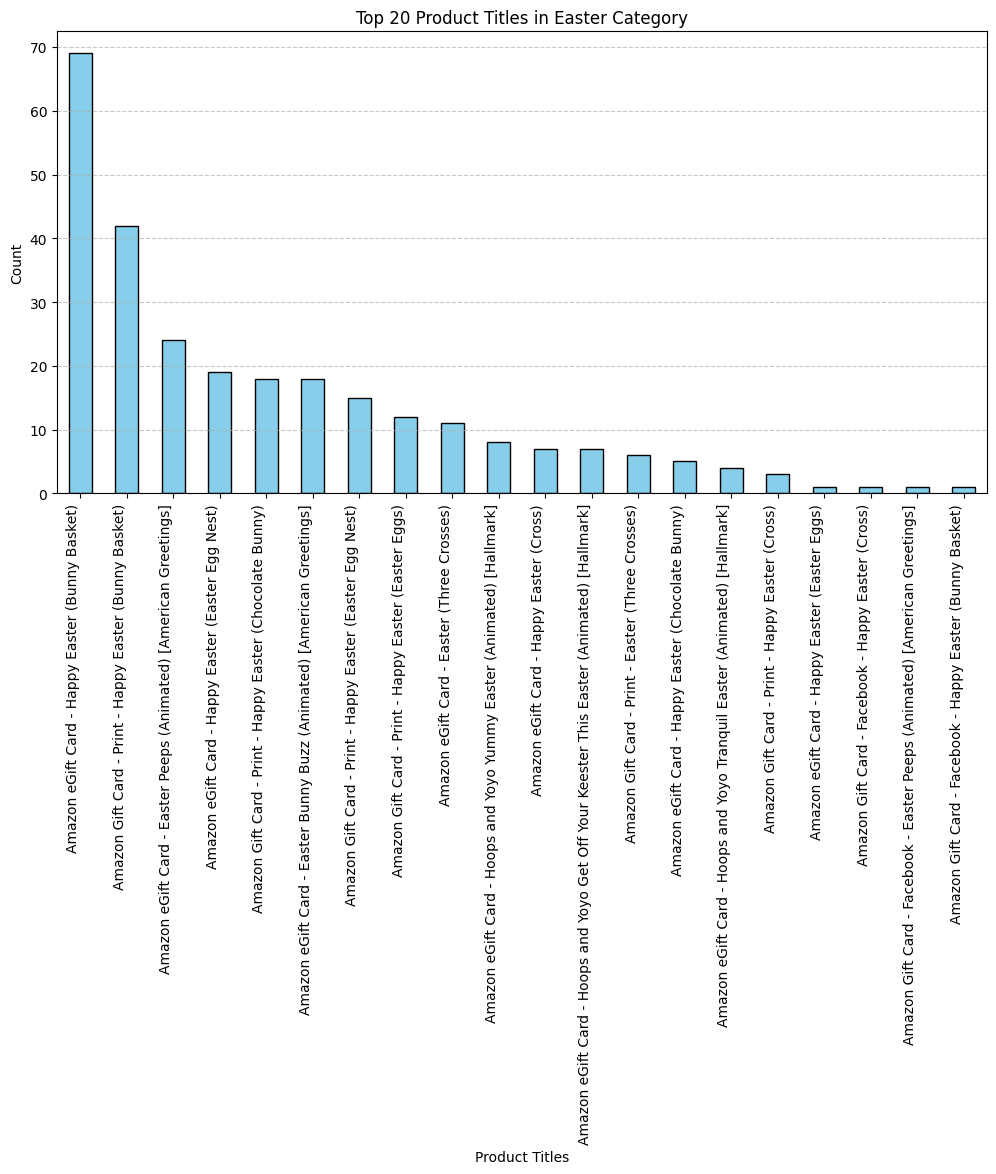

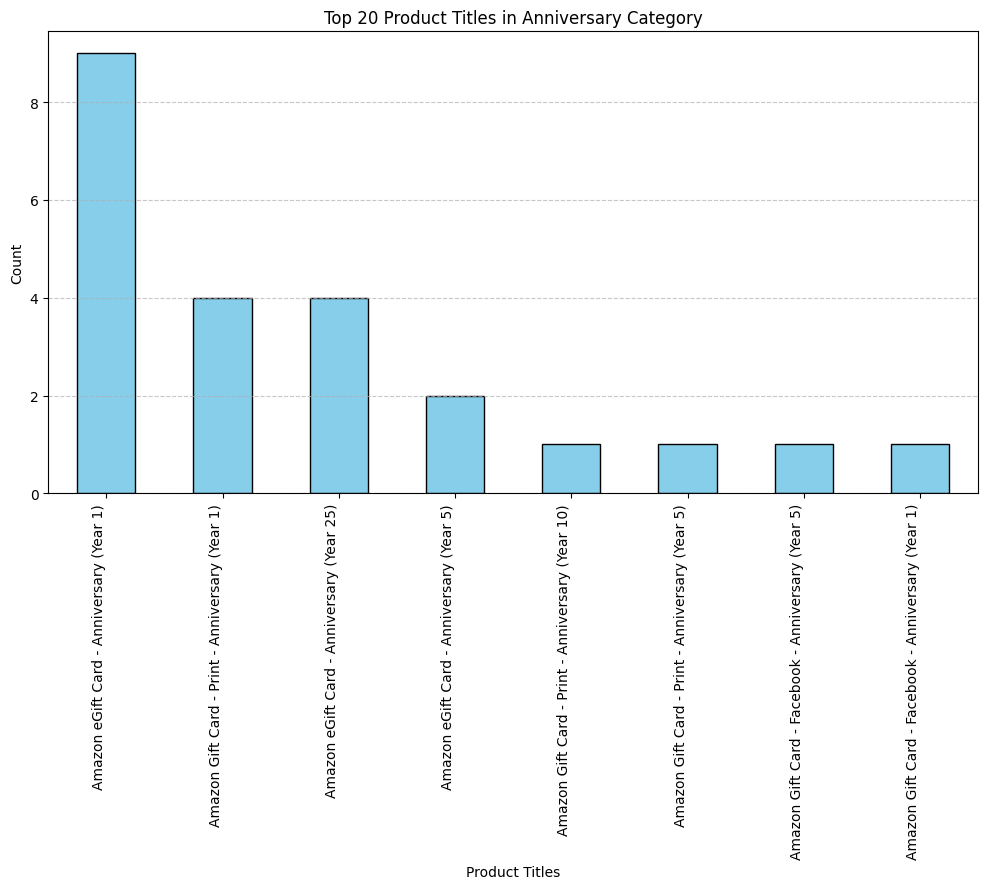

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")  # Ensure you have the updated dataset

# Get unique categories
categories = df["category"].unique()

# Generate separate bar charts for each category with only 20 unique product titles
for category in categories:
    category_data = df[df["category"] == category]["product_title"].value_counts().head(20)  # Take top 20 unique product titles

    if not category_data.empty:  # Ensure there is data to plot
        plt.figure(figsize=(12, 6))
        category_data.plot(kind="bar", color="skyblue", edgecolor="black")

        # Customize the plot
        plt.xlabel("Product Titles")
        plt.ylabel("Count")
        plt.title(f"Top 20 Product Titles in {category} Category")
        plt.xticks(rotation=90, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Show the plot
        plt.show()

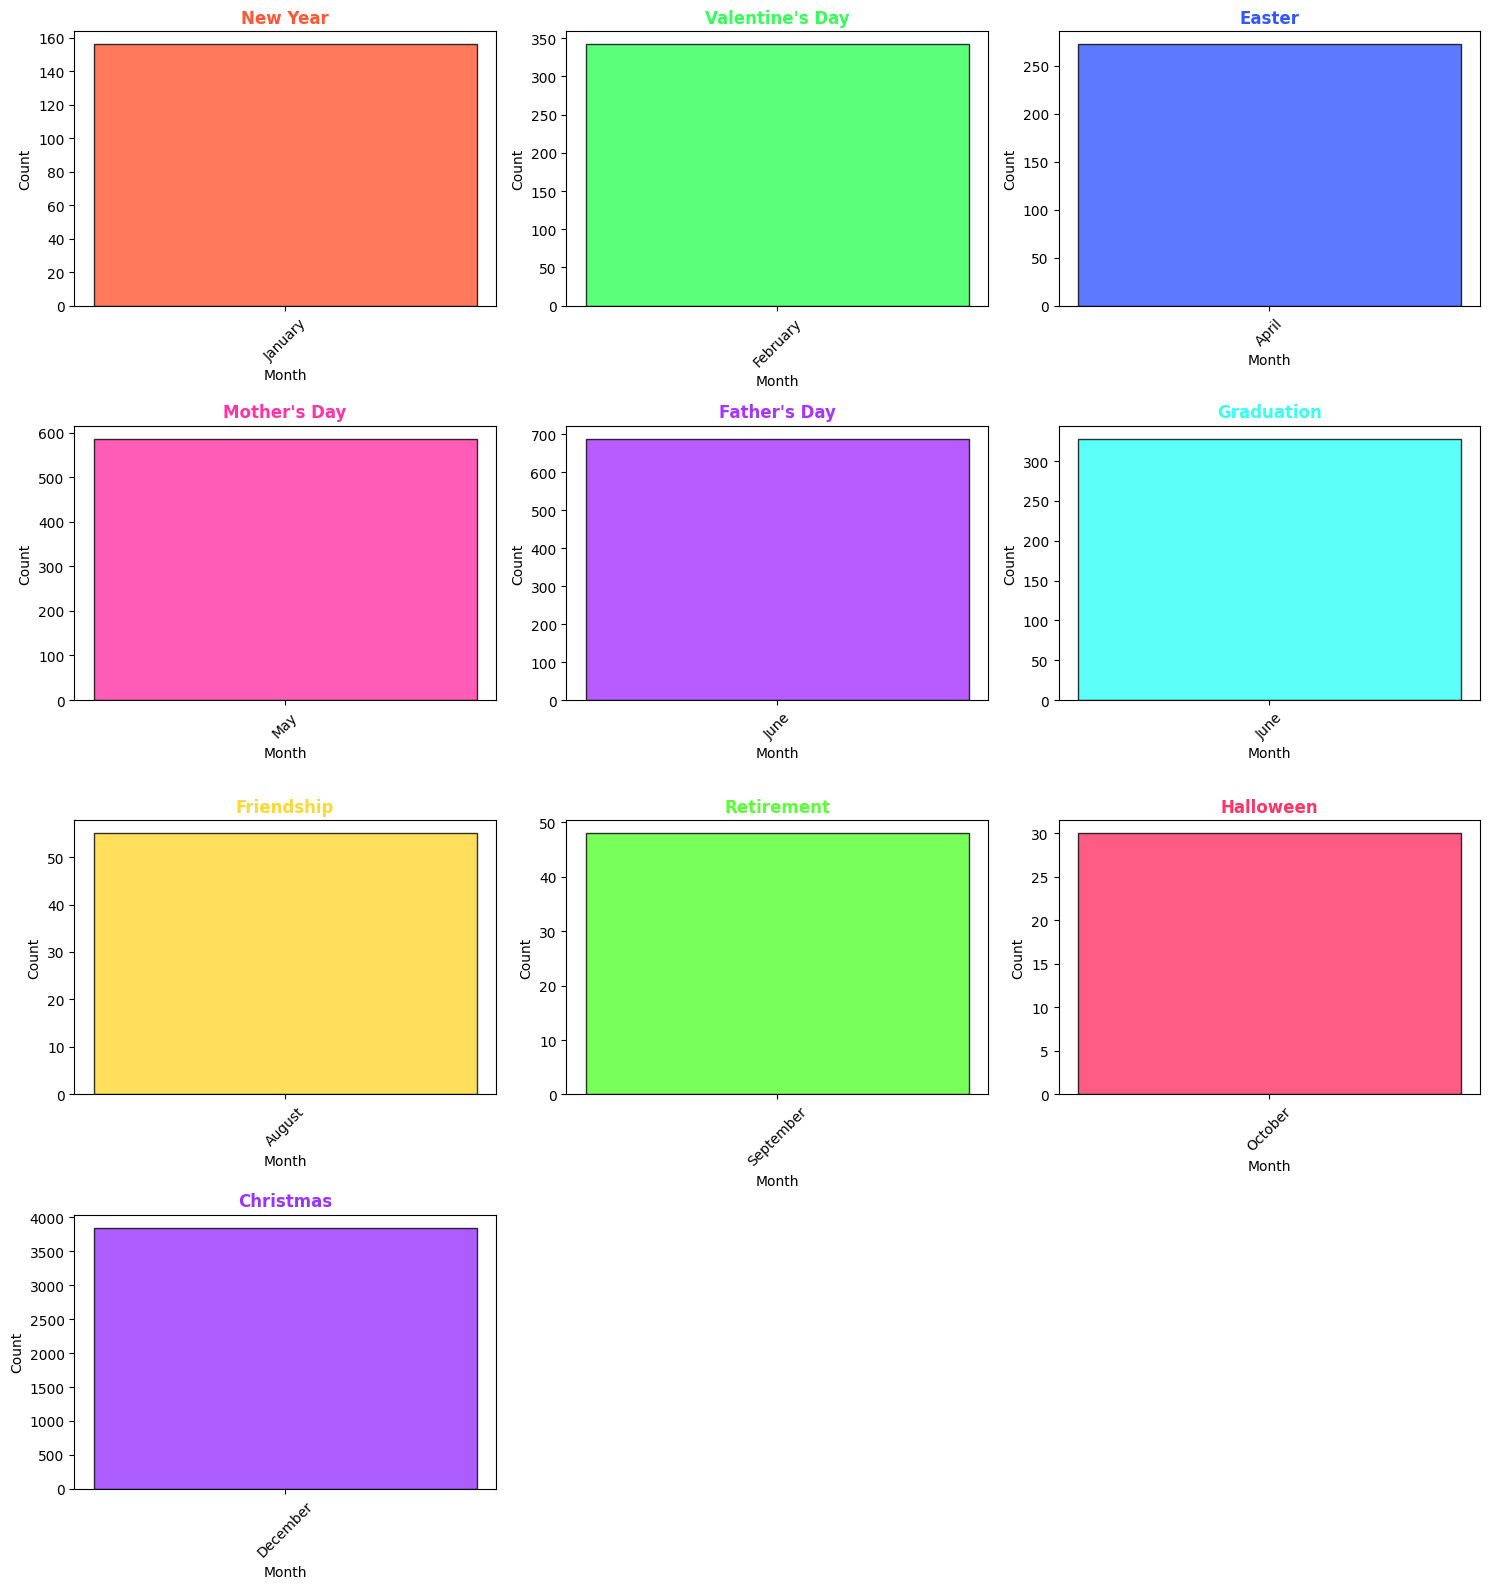

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv("updated_amazon_reviews.csv")  # Ensure it has updated categories

# # Define month-wise category mapping
# month_category_mapping = {
#     "January": ["New Year"],
#     "February": ["Valentine's Day"],
#     "March": ["Women's Day"],
#     "April": ["Easter"],
#     "May": ["Mother's Day"],
#     "June": ["Father's Day", "Graduation"],
#     "July": ["Independence Day"],
#     "August": ["Friendship"],
#     "September": ["Retirement"],
#     "October": ["Halloween"],
#     "November": ["Thanksgiving"],
#     "December": ["Christmas"]
# }

# # Assign months based on category
# df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# # Count occurrences of each festival category per month
# festival_counts = df.groupby(["month", "category"])["product_title"].count().reset_index()

# # Sort data by month order
# festival_counts["month"] = pd.Categorical(festival_counts["month"], categories=month_category_mapping.keys(), ordered=True)
# festival_counts = festival_counts.sort_values("month")

# # Get unique festivals
# unique_festivals = festival_counts["category"].unique()
# num_festivals = len(unique_festivals)

# # Define unique colors for better clarity
# colors = [
#     "#FF5733", "#33FF57", "#3357FF", "#FF33A6", "#A633FF",
#     "#33FFF5", "#FFD733", "#57FF33", "#FF3366", "#9933FF",
#     "#F4A460", "#20B2AA"
# ]

# # Create subplots
# rows = (num_festivals // 3) + 1  # Adjust row count
# cols = 3  # Fixed number of columns
# fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

# # Flatten axes array if needed
# axes = axes.flatten()

# # Plot each festival in a separate subplot with different colors
# for i, festival in enumerate(unique_festivals):
#     subset = festival_counts[festival_counts["category"] == festival]

#     axes[i].bar(subset["month"], subset["product_title"], color=colors[i % len(colors)], alpha=0.8, edgecolor="black")
#     axes[i].set_title(festival, fontsize=12, fontweight="bold", color=colors[i % len(colors)])
#     axes[i].set_xlabel("Month", fontsize=10)
#     axes[i].set_ylabel("Count", fontsize=10)
#     axes[i].tick_params(axis="x", rotation=45)

# # Hide unused subplots (if any)
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout
# plt.tight_layout()
# plt.show()


##Top 5 sales of each month

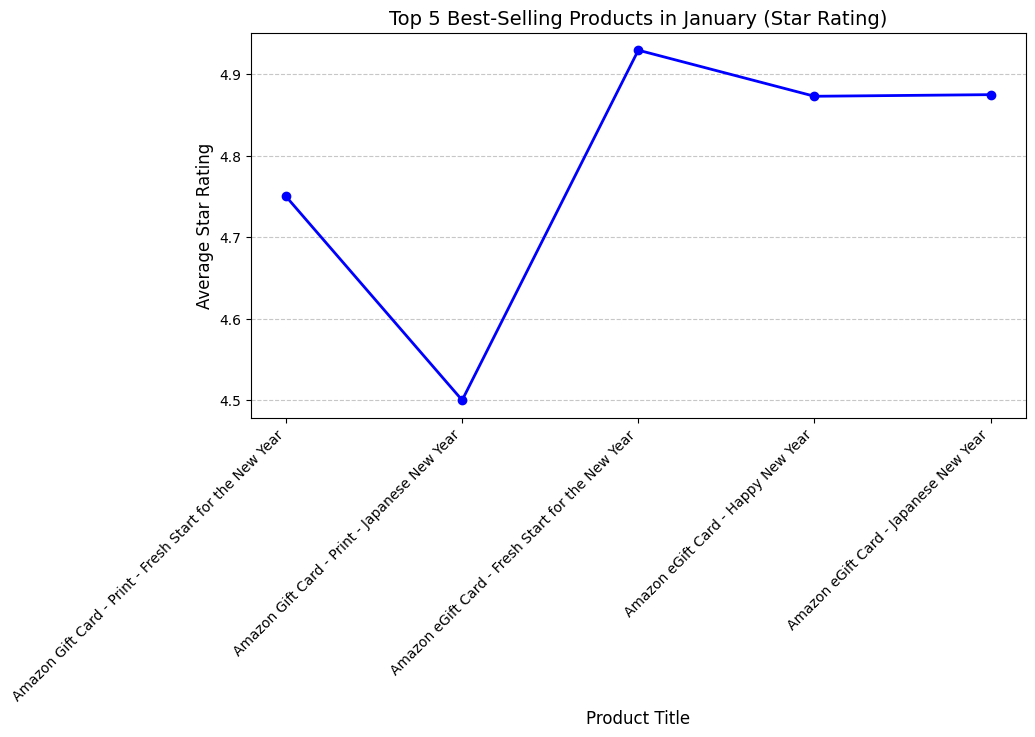

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for January
df_january = df[df["month"] == "January"]

# Check if there are records for January
if df_january.empty:
    print("No data available for January.")
else:
    # Count occurrences of each product in January
    product_sales = df_january["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 5 best-selling products
    top_5_products = product_sales.head(5)

    # Filter original dataset for only these products
    top_5_df = df_january[df_january["product_title"].isin(top_5_products["product_title"])]

    # Group by product_title and compute average star rating
    avg_ratings = top_5_df.groupby("product_title")["star_rating"].mean()

    # Plot line chart
    plt.figure(figsize=(10, 5))
    plt.plot(avg_ratings.index, avg_ratings.values, marker="o", linestyle="-", color="blue", linewidth=2)

    # Labels and title
    plt.xlabel("Product Title", fontsize=12)
    plt.ylabel("Average Star Rating", fontsize=12)
    plt.title("Top 5 Best-Selling Products in January (Star Rating)", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()


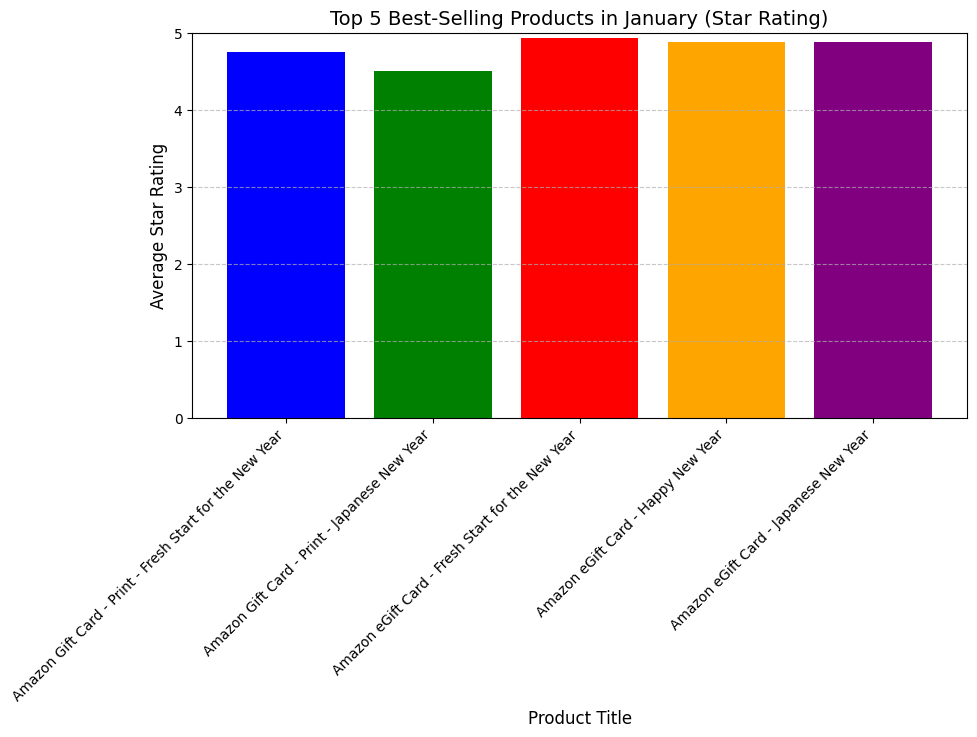

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for January
df_january = df[df["month"] == "January"]

# Check if there are records for January
if df_january.empty:
    print("No data available for January.")
else:
    # Count occurrences of each product in January
    product_sales = df_january["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 5 best-selling products
    top_5_products = product_sales.head(5)

    # Filter original dataset for only these products
    top_5_df = df_january[df_january["product_title"].isin(top_5_products["product_title"])]

    # Group by product_title and compute average star rating
    avg_ratings = top_5_df.groupby("product_title")["star_rating"].mean()

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(avg_ratings.index, avg_ratings.values, color=["blue", "green", "red", "orange", "purple"])

    # Labels and title
    plt.xlabel("Product Title", fontsize=12)
    plt.ylabel("Average Star Rating", fontsize=12)
    plt.title("Top 5 Best-Selling Products in January (Star Rating)", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 5)  # Star ratings range from 0 to 5
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()


#Top 10 gifts of each month

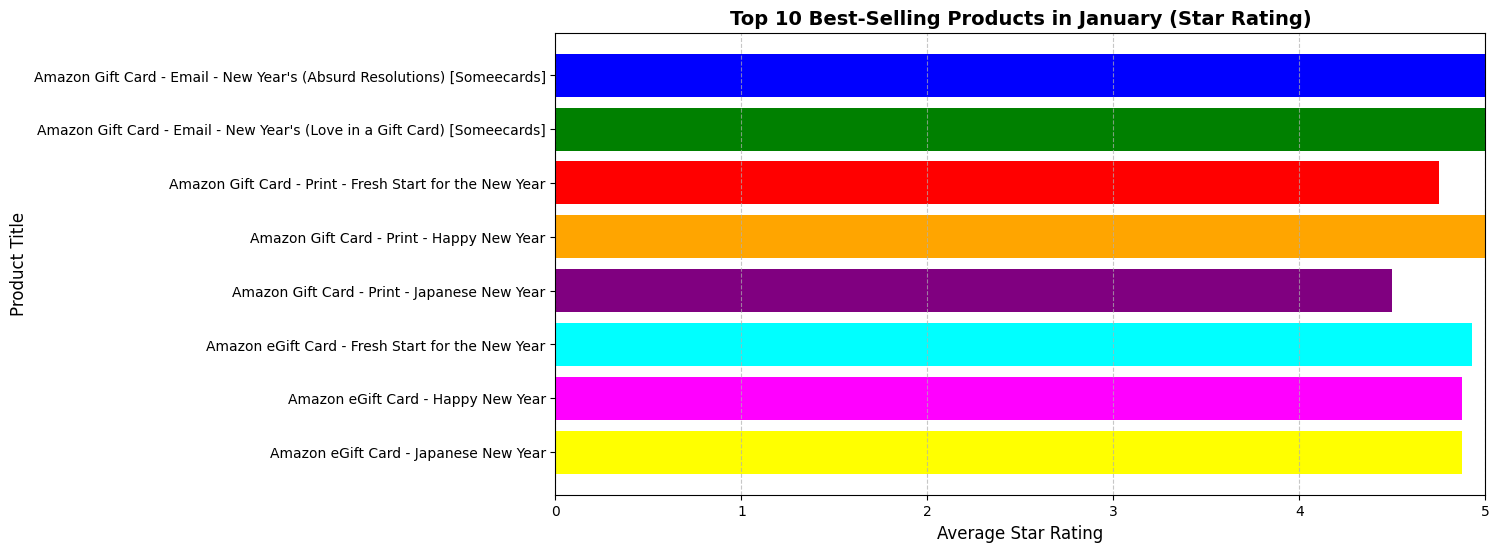

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for January
df_january = df[df["month"] == "January"]

# Check if there are records for January
if df_january.empty:
    print("No data available for January.")
else:
    # Count occurrences of each product in January
    product_sales = df_january["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 best-selling products
    top_10_products = product_sales.head(10)

    # Filter original dataset for only these products
    top_10_df = df_january[df_january["product_title"].isin(top_10_products["product_title"])]

    # Group by product_title and compute average star rating
    avg_ratings = top_10_df.groupby("product_title")["star_rating"].mean()

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    plt.barh(avg_ratings.index, avg_ratings.values, color=["blue", "green", "red", "orange", "purple", "cyan", "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Average Star Rating", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Best-Selling Products in January (Star Rating)", fontsize=14, fontweight="bold")
    plt.xlim(0, 5)  # Star ratings range from 0 to 5
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


##Top 10 cards with sales of each month

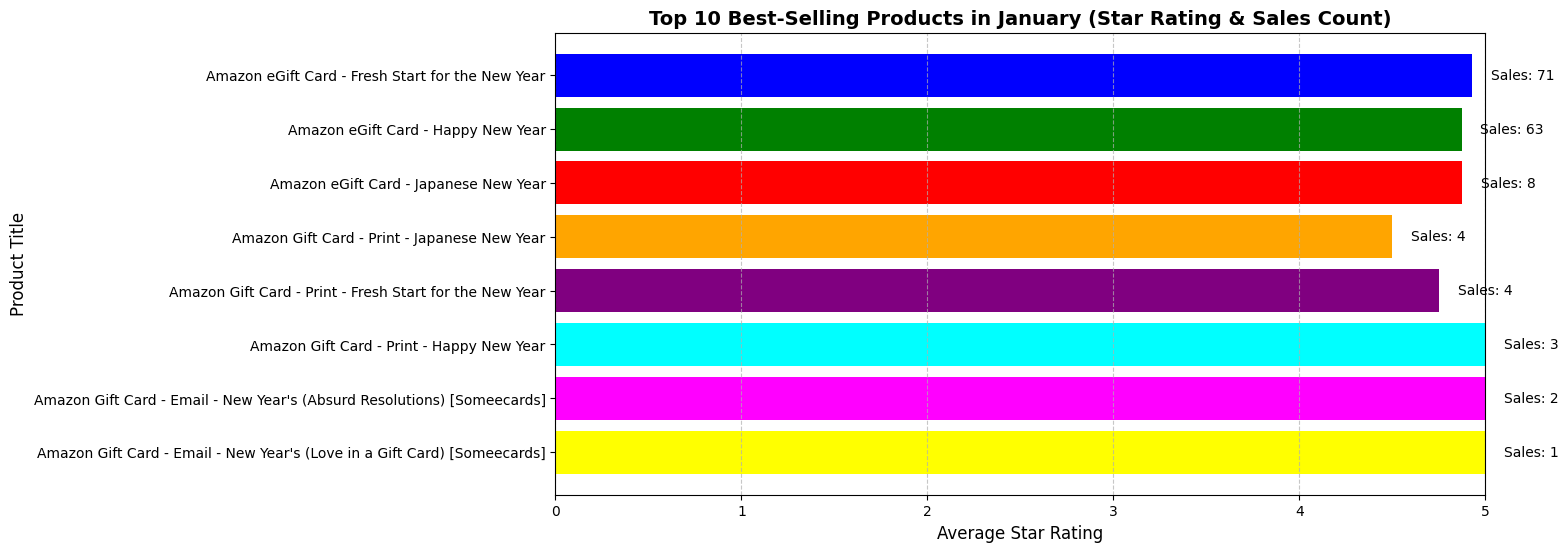

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for January
df_january = df[df["month"] == "January"]

# Check if there are records for January
if df_january.empty:
    print("No data available for January.")
else:
    # Count occurrences of each product in January
    product_sales = df_january["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 best-selling products
    top_10_products = product_sales.head(10)

    # Filter original dataset for only these products
    top_10_df = df_january[df_january["product_title"].isin(top_10_products["product_title"])]

    # Group by product_title and compute average star rating
    avg_ratings = top_10_df.groupby("product_title")["star_rating"].mean().reset_index()

    # Merge sales count with average ratings
    top_10_final = pd.merge(top_10_products, avg_ratings, on="product_title")

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_final["product_title"], top_10_final["star_rating"],
                     color=["blue", "green", "red", "orange", "purple", "cyan",
                            "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Average Star Rating", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Best-Selling Products in January (Star Rating & Sales Count)", fontsize=14, fontweight="bold")
    plt.xlim(0, 5)  # Star ratings range from 0 to 5
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_final["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


##More appropiate show graph of jan month dta with sales

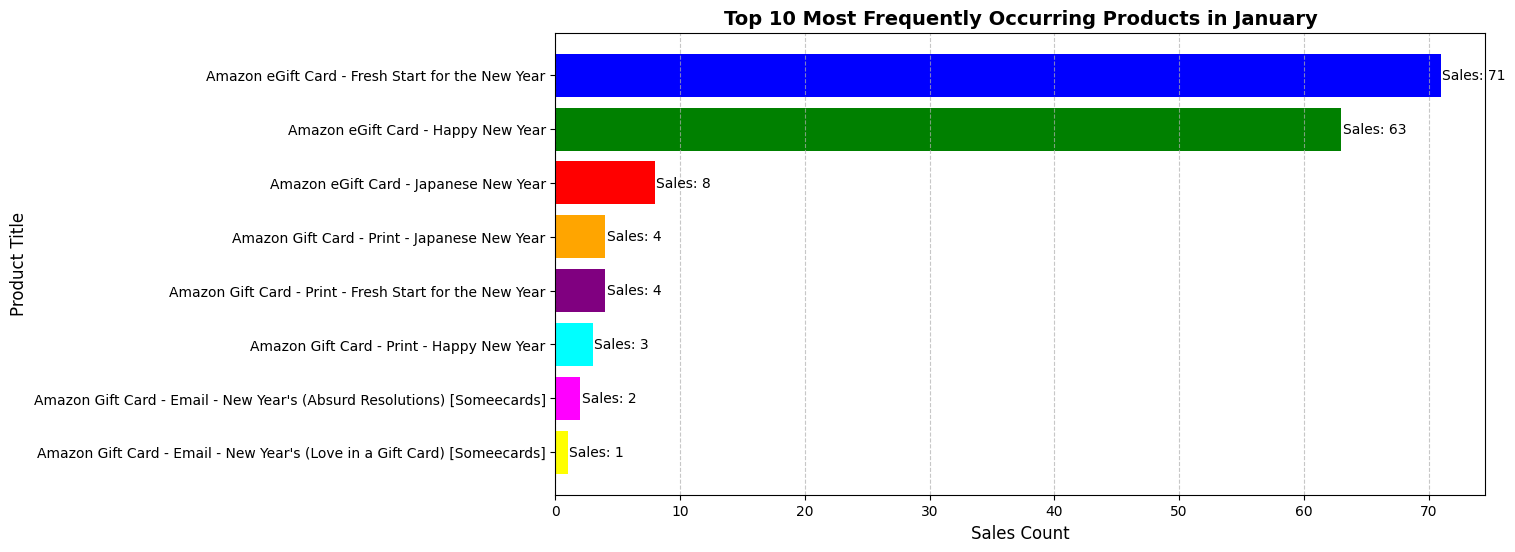

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for January
df_january = df[df["month"] == "January"]

# Check if there are records for January
if df_january.empty:
    print("No data available for January.")
else:
    # Count occurrences of each product in January
    product_sales = df_january["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in January", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


#More appropiate show graph of feb month dta with sales

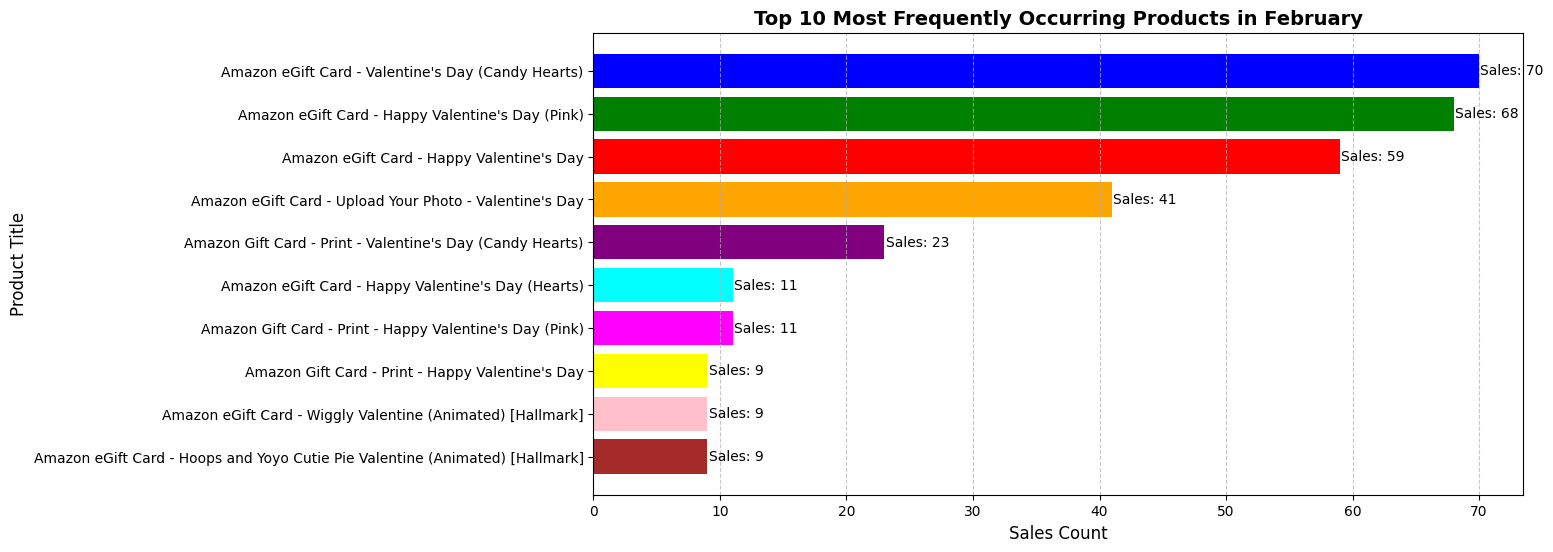

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for February
df_february = df[df["month"] == "February"]

# Check if there are records for February
if df_february.empty:
    print("No data available for February.")
else:
    # Count occurrences of each product in February
    product_sales = df_february["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in February", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


#More appropiate show graph of march month dta with sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for March
df_march = df[df["month"] == "March"]

# Check if there are records for March
if df_march.empty:
    print("No data available for March.")
else:
    # Count occurrences of each product in March
    product_sales = df_march["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in March", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


No data available for March.


#More appropiate show graph of april month dta with sales

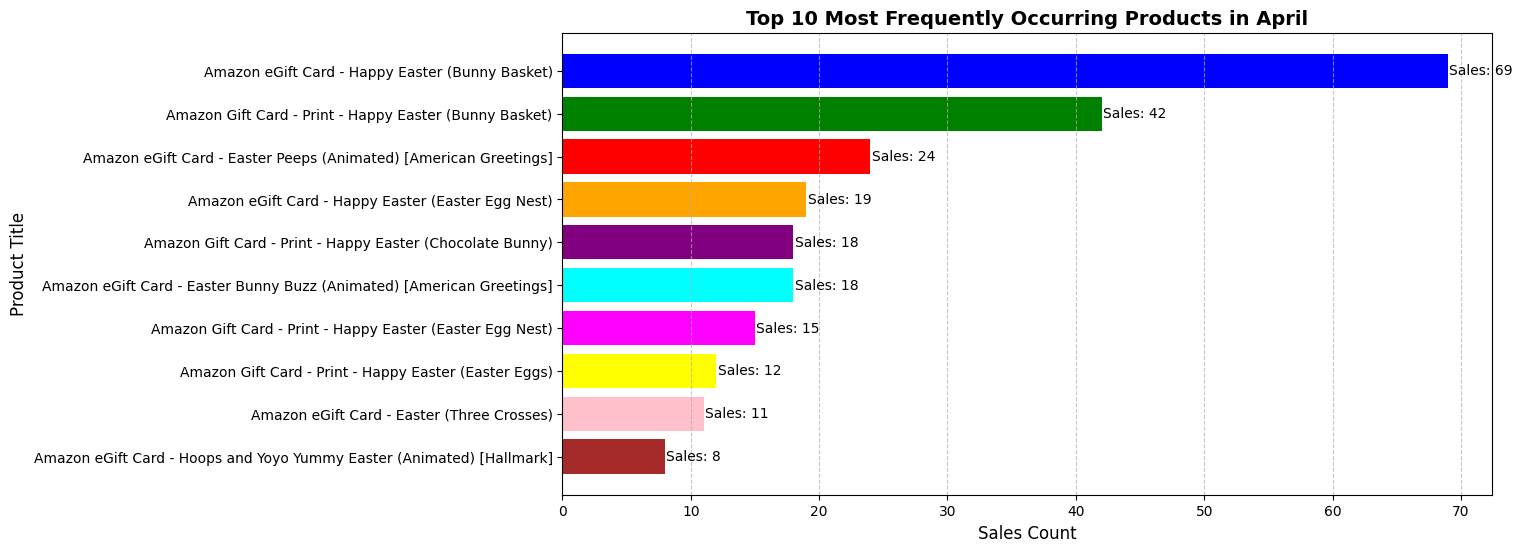

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for April
df_april = df[df["month"] == "April"]

# Check if there are records for April
if df_april.empty:
    print("No data available for April.")
else:
    # Count occurrences of each product in April
    product_sales = df_april["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in April", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


#More appropiate show graph of may month dta with sales

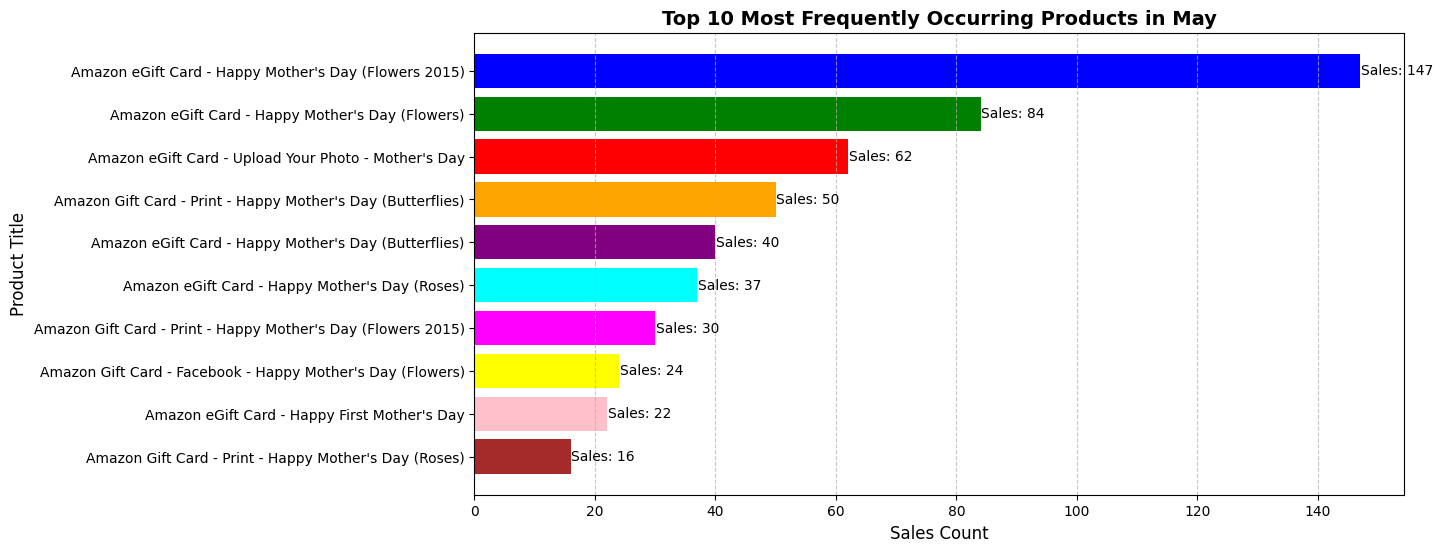

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for May
df_may = df[df["month"] == "May"]

# Check if there are records for May
if df_may.empty:
    print("No data available for May.")
else:
    # Count occurrences of each product in May
    product_sales = df_may["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in May", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


#More appropiate show graph of july month dta with sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for July
df_july = df[df["month"] == "July"]

# Check if there are records for July
if df_july.empty:
    print("No data available for July.")
else:
    # Count occurrences of each product in July
    product_sales = df_july["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in July", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


No data available for July.


#More appropiate show graph of August month dta with sales

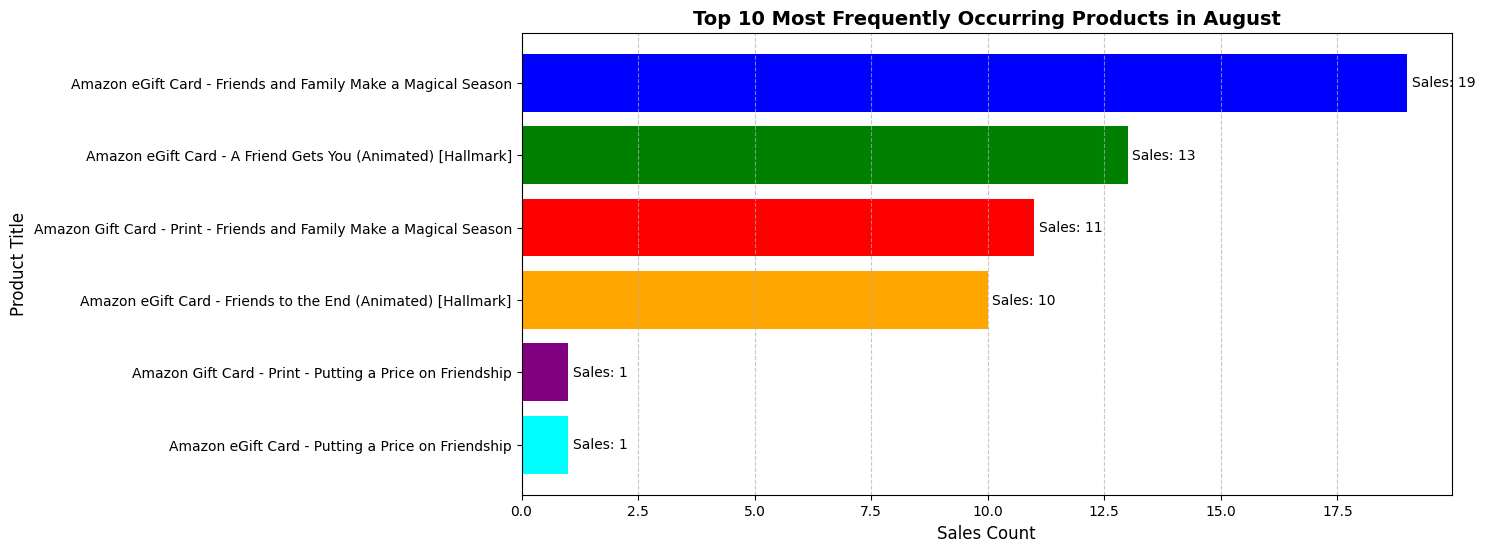

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for August
df_august = df[df["month"] == "August"]

# Check if there are records for August
if df_august.empty:
    print("No data available for August.")
else:
    # Count occurrences of each product in August
    product_sales = df_august["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in August", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


#More appropiate show graph of September month dta with sales

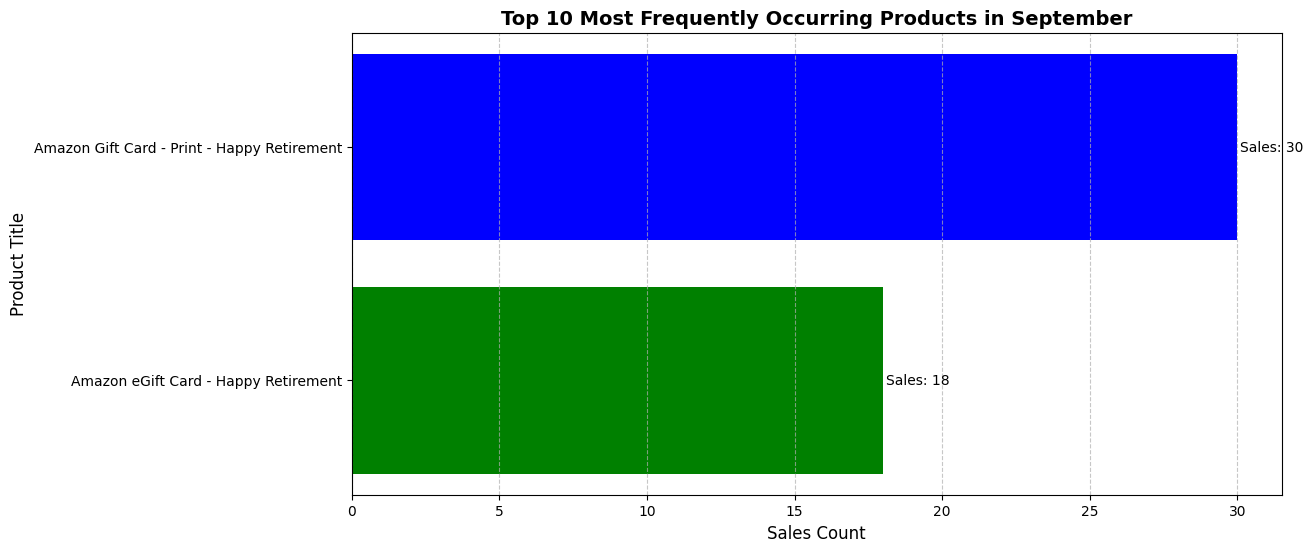

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for September
df_september = df[df["month"] == "September"]

# Check if there are records for September
if df_september.empty:
    print("No data available for September.")
else:
    # Count occurrences of each product in September
    product_sales = df_september["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in September", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()



#More appropiate show graph of October month dta with sales

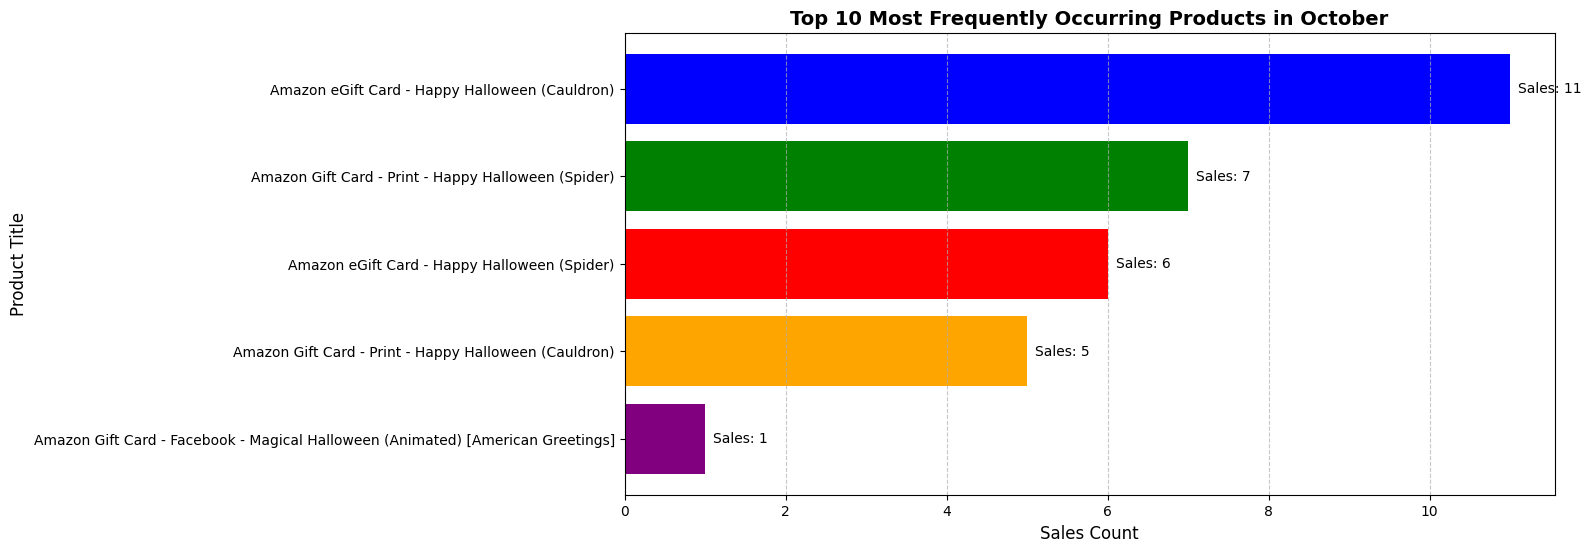

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for October
df_october = df[df["month"] == "October"]

# Check if there are records for October
if df_october.empty:
    print("No data available for October.")
else:
    # Count occurrences of each product in October
    product_sales = df_october["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in October", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


#More appropiate show graph of November month dta with sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for November
df_november = df[df["month"] == "November"]

# Check if there are records for November
if df_november.empty:
    print("No data available for November.")
else:
    # Count occurrences of each product in November
    product_sales = df_november["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in November", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


No data available for November.


#More appropiate show graph of december month dta with sales

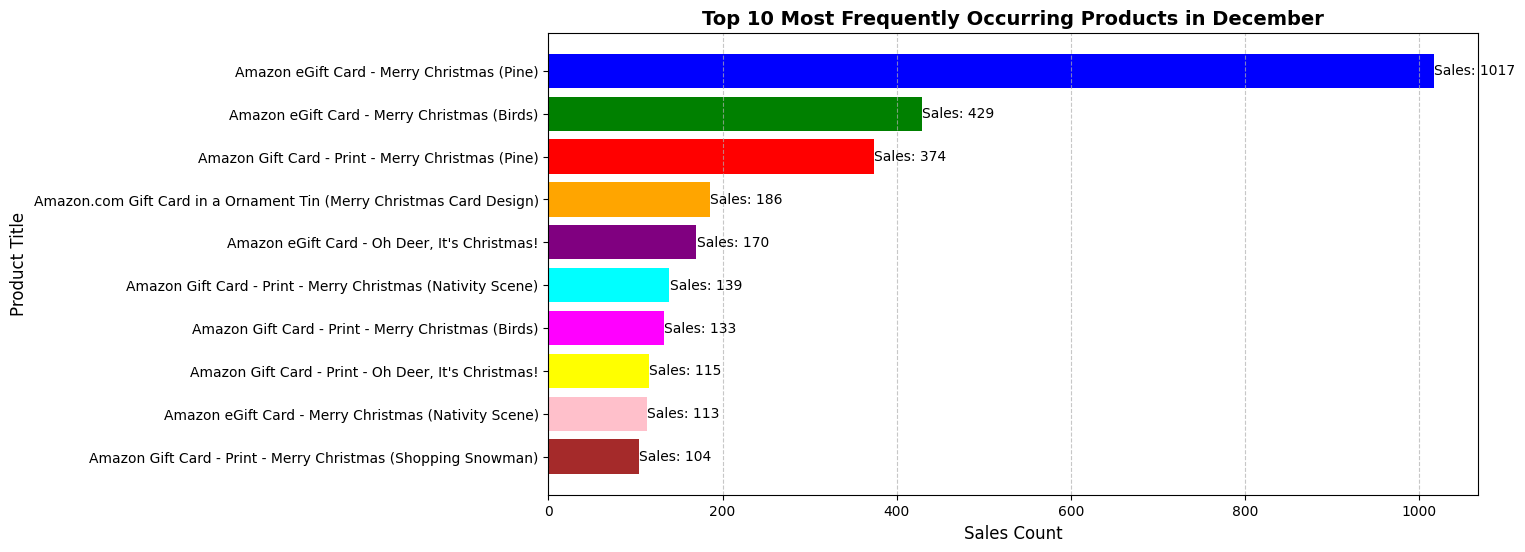

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Filter data for December
df_december = df[df["month"] == "December"]

# Check if there are records for December
if df_december.empty:
    print("No data available for December.")
else:
    # Count occurrences of each product in December
    product_sales = df_december["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 most frequently occurring products
    top_10_products = product_sales.head(10)

    # Plot bar chart for sales count
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                    color=["blue", "green", "red", "orange", "purple", "cyan",
                           "magenta", "yellow", "pink", "brown"])

    # Labels and title
    plt.xlabel("Sales Count", fontsize=12)
    plt.ylabel("Product Title", fontsize=12)
    plt.title("Top 10 Most Frequently Occurring Products in December", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f"Sales: {count}", va="center", fontsize=10)

    # Invert y-axis to show highest-selling product at the top
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Count occurrences of each product_title
product_sales = df["product_title"].value_counts().reset_index()
product_sales.columns = ["product_title", "sales_count"]

# Get the total count of all product_titles
total_count = product_sales["sales_count"].sum()

print(f"Total count of all product titles: {total_count}")


Total count of all product titles: 77008


#Take all month in one graph

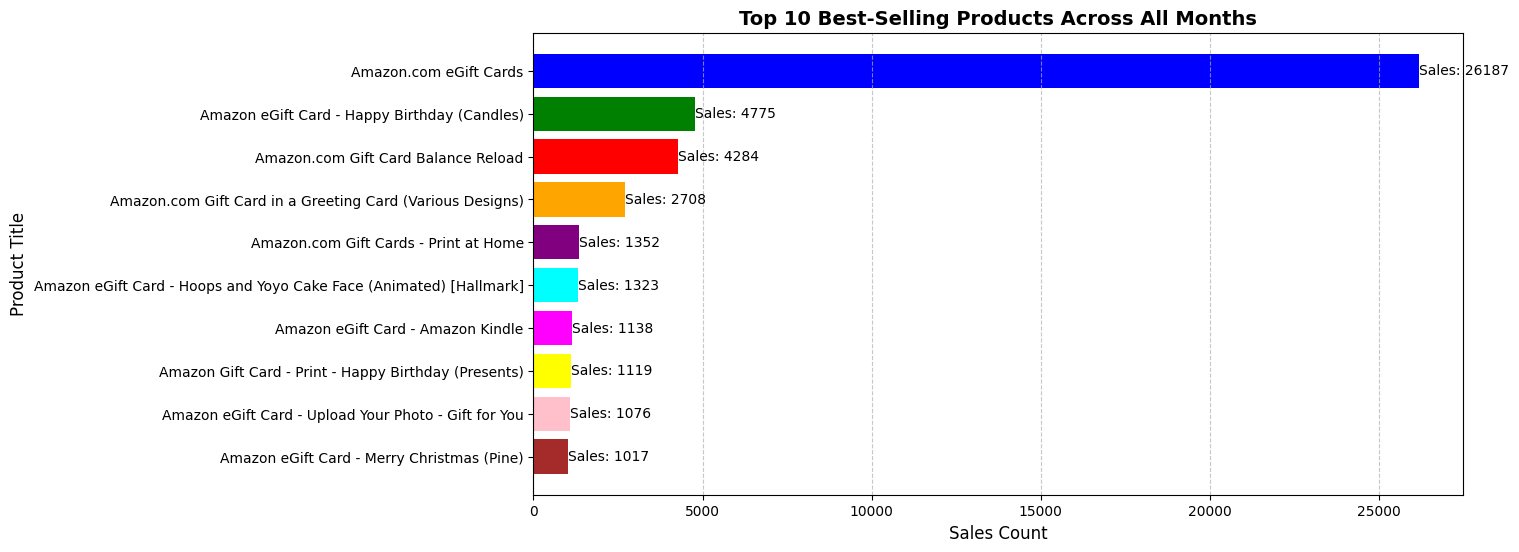

Total count of all product titles: 77008


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Count occurrences of each product_title across all months
product_sales = df["product_title"].value_counts().reset_index()
product_sales.columns = ["product_title", "sales_count"]

# Select top 10 most frequently occurring products
top_10_products = product_sales.head(10)

# Plot bar chart for sales count
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_products["product_title"], top_10_products["sales_count"],
                color=["blue", "green", "red", "orange", "purple", "cyan",
                       "magenta", "yellow", "pink", "brown"])

# Labels and title
plt.xlabel("Sales Count", fontsize=12)
plt.ylabel("Product Title", fontsize=12)
plt.title("Top 10 Best-Selling Products Across All Months", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate bars with sales count
for bar, count in zip(bars, top_10_products["sales_count"]):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"Sales: {count}", va="center", fontsize=10)

# Invert y-axis to show highest-selling product at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()

# Optionally, print the total count of all product titles
total_count = product_sales["sales_count"].sum()
print(f"Total count of all product titles: {total_count}")


##show all month graph in one interface

<ipython-input-6-8c7e05f74e82>:86: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-8c7e05f74e82>:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


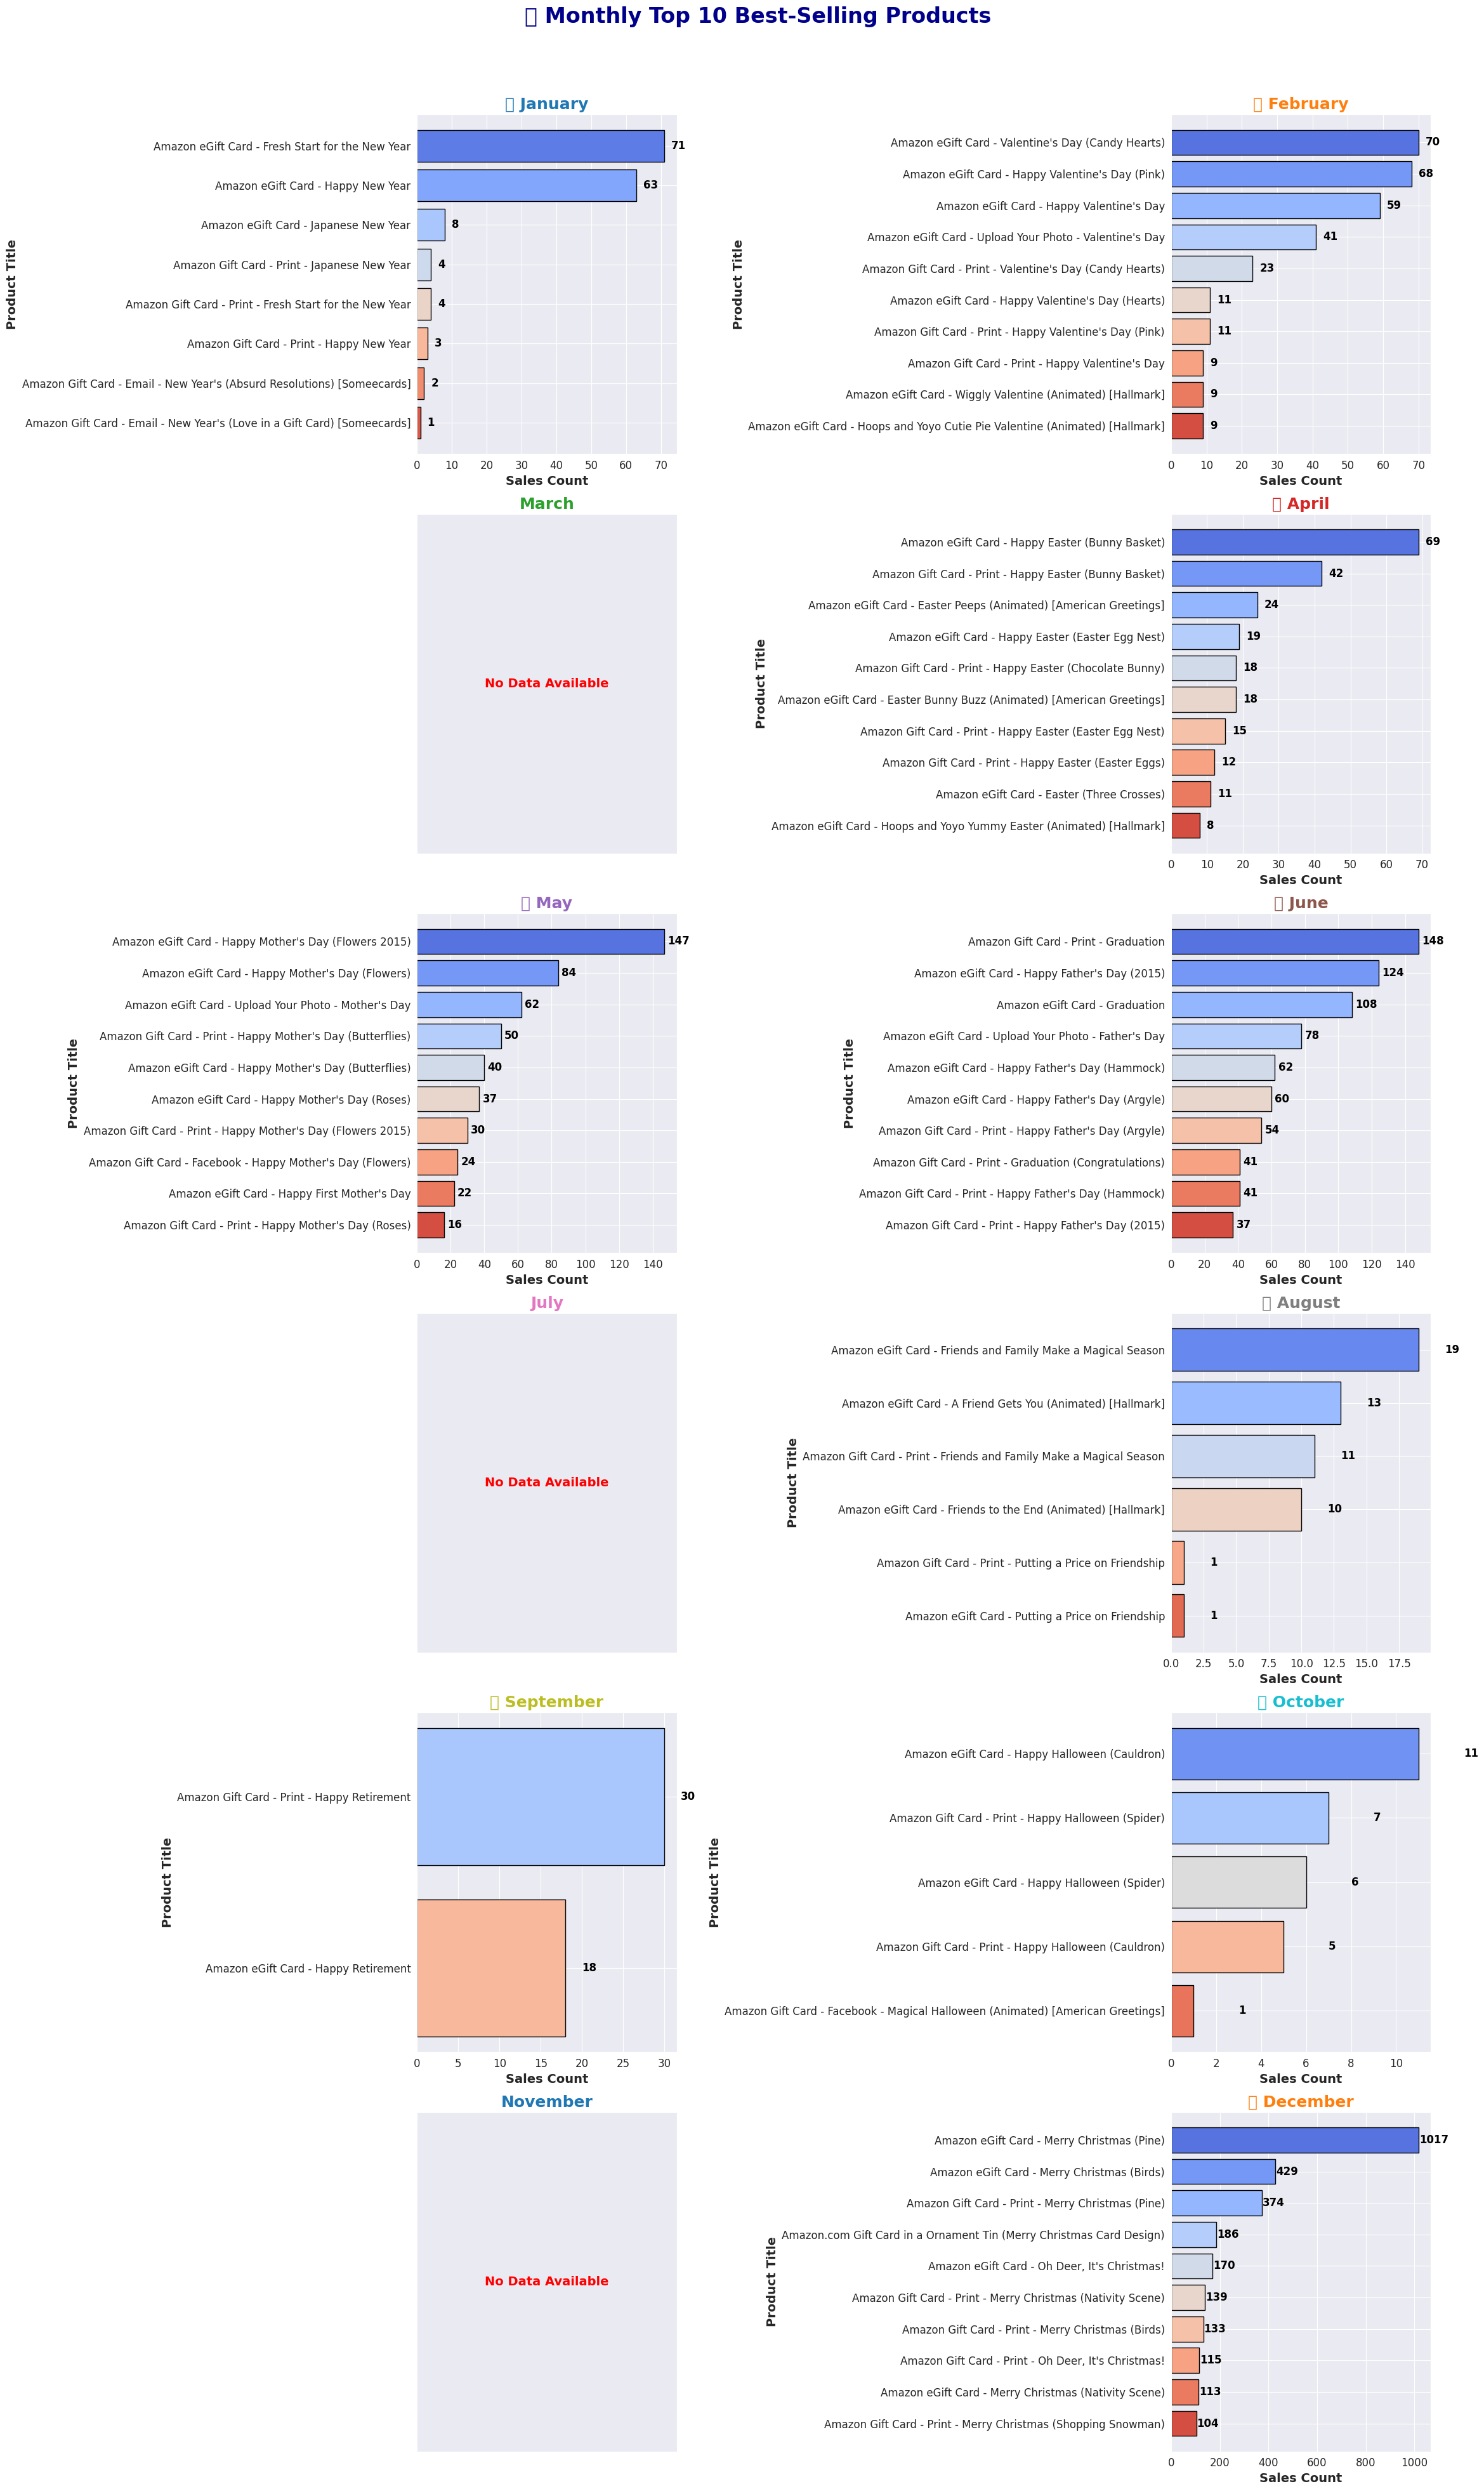

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Define month order
months = list(month_category_mapping.keys())

# Set up modern Seaborn styling
sns.set_style("darkgrid")

# Define a color palette for months
month_colors = sns.color_palette("tab10", 12)

# Create a larger figure with 6 rows and 2 columns (2 charts per row)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(24, 40))
fig.suptitle("📊 Monthly Top 10 Best-Selling Products", fontsize=24, fontweight="bold", color="darkblue")

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each month and generate its plot
for i, month in enumerate(months):
    df_month = df[df["month"] == month]

    if df_month.empty:
        axes[i].text(0.5, 0.5, "No Data Available", ha="center", va="center", fontsize=14, color="red", fontweight="bold")
        axes[i].set_title(f"{month}", fontsize=18, fontweight="bold", color=month_colors[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        continue

    # Count occurrences of each product
    product_sales = df_month["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 best sellers
    top_10_products = product_sales.head(10)

    # Choose color gradient
    colors = sns.color_palette("coolwarm", len(top_10_products))

    # Create horizontal bar chart using Seaborn
    bars = axes[i].barh(top_10_products["product_title"], top_10_products["sales_count"], color=colors, edgecolor="black")

    # Title styling
    axes[i].set_title(f"📅 {month}", fontsize=18, fontweight="bold", color=month_colors[i])

    # Labels and ticks
    axes[i].set_xlabel("Sales Count", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Product Title", fontsize=14, fontweight="bold")
    axes[i].tick_params(axis="both", labelsize=12)

    # Invert y-axis for better readability
    axes[i].invert_yaxis()

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        axes[i].text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
                     f"{count}", va="center", fontsize=12, color="black", fontweight="bold")

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


##show all month quartwise

<ipython-input-7-ecc26f213f84>:97: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-ecc26f213f84>:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


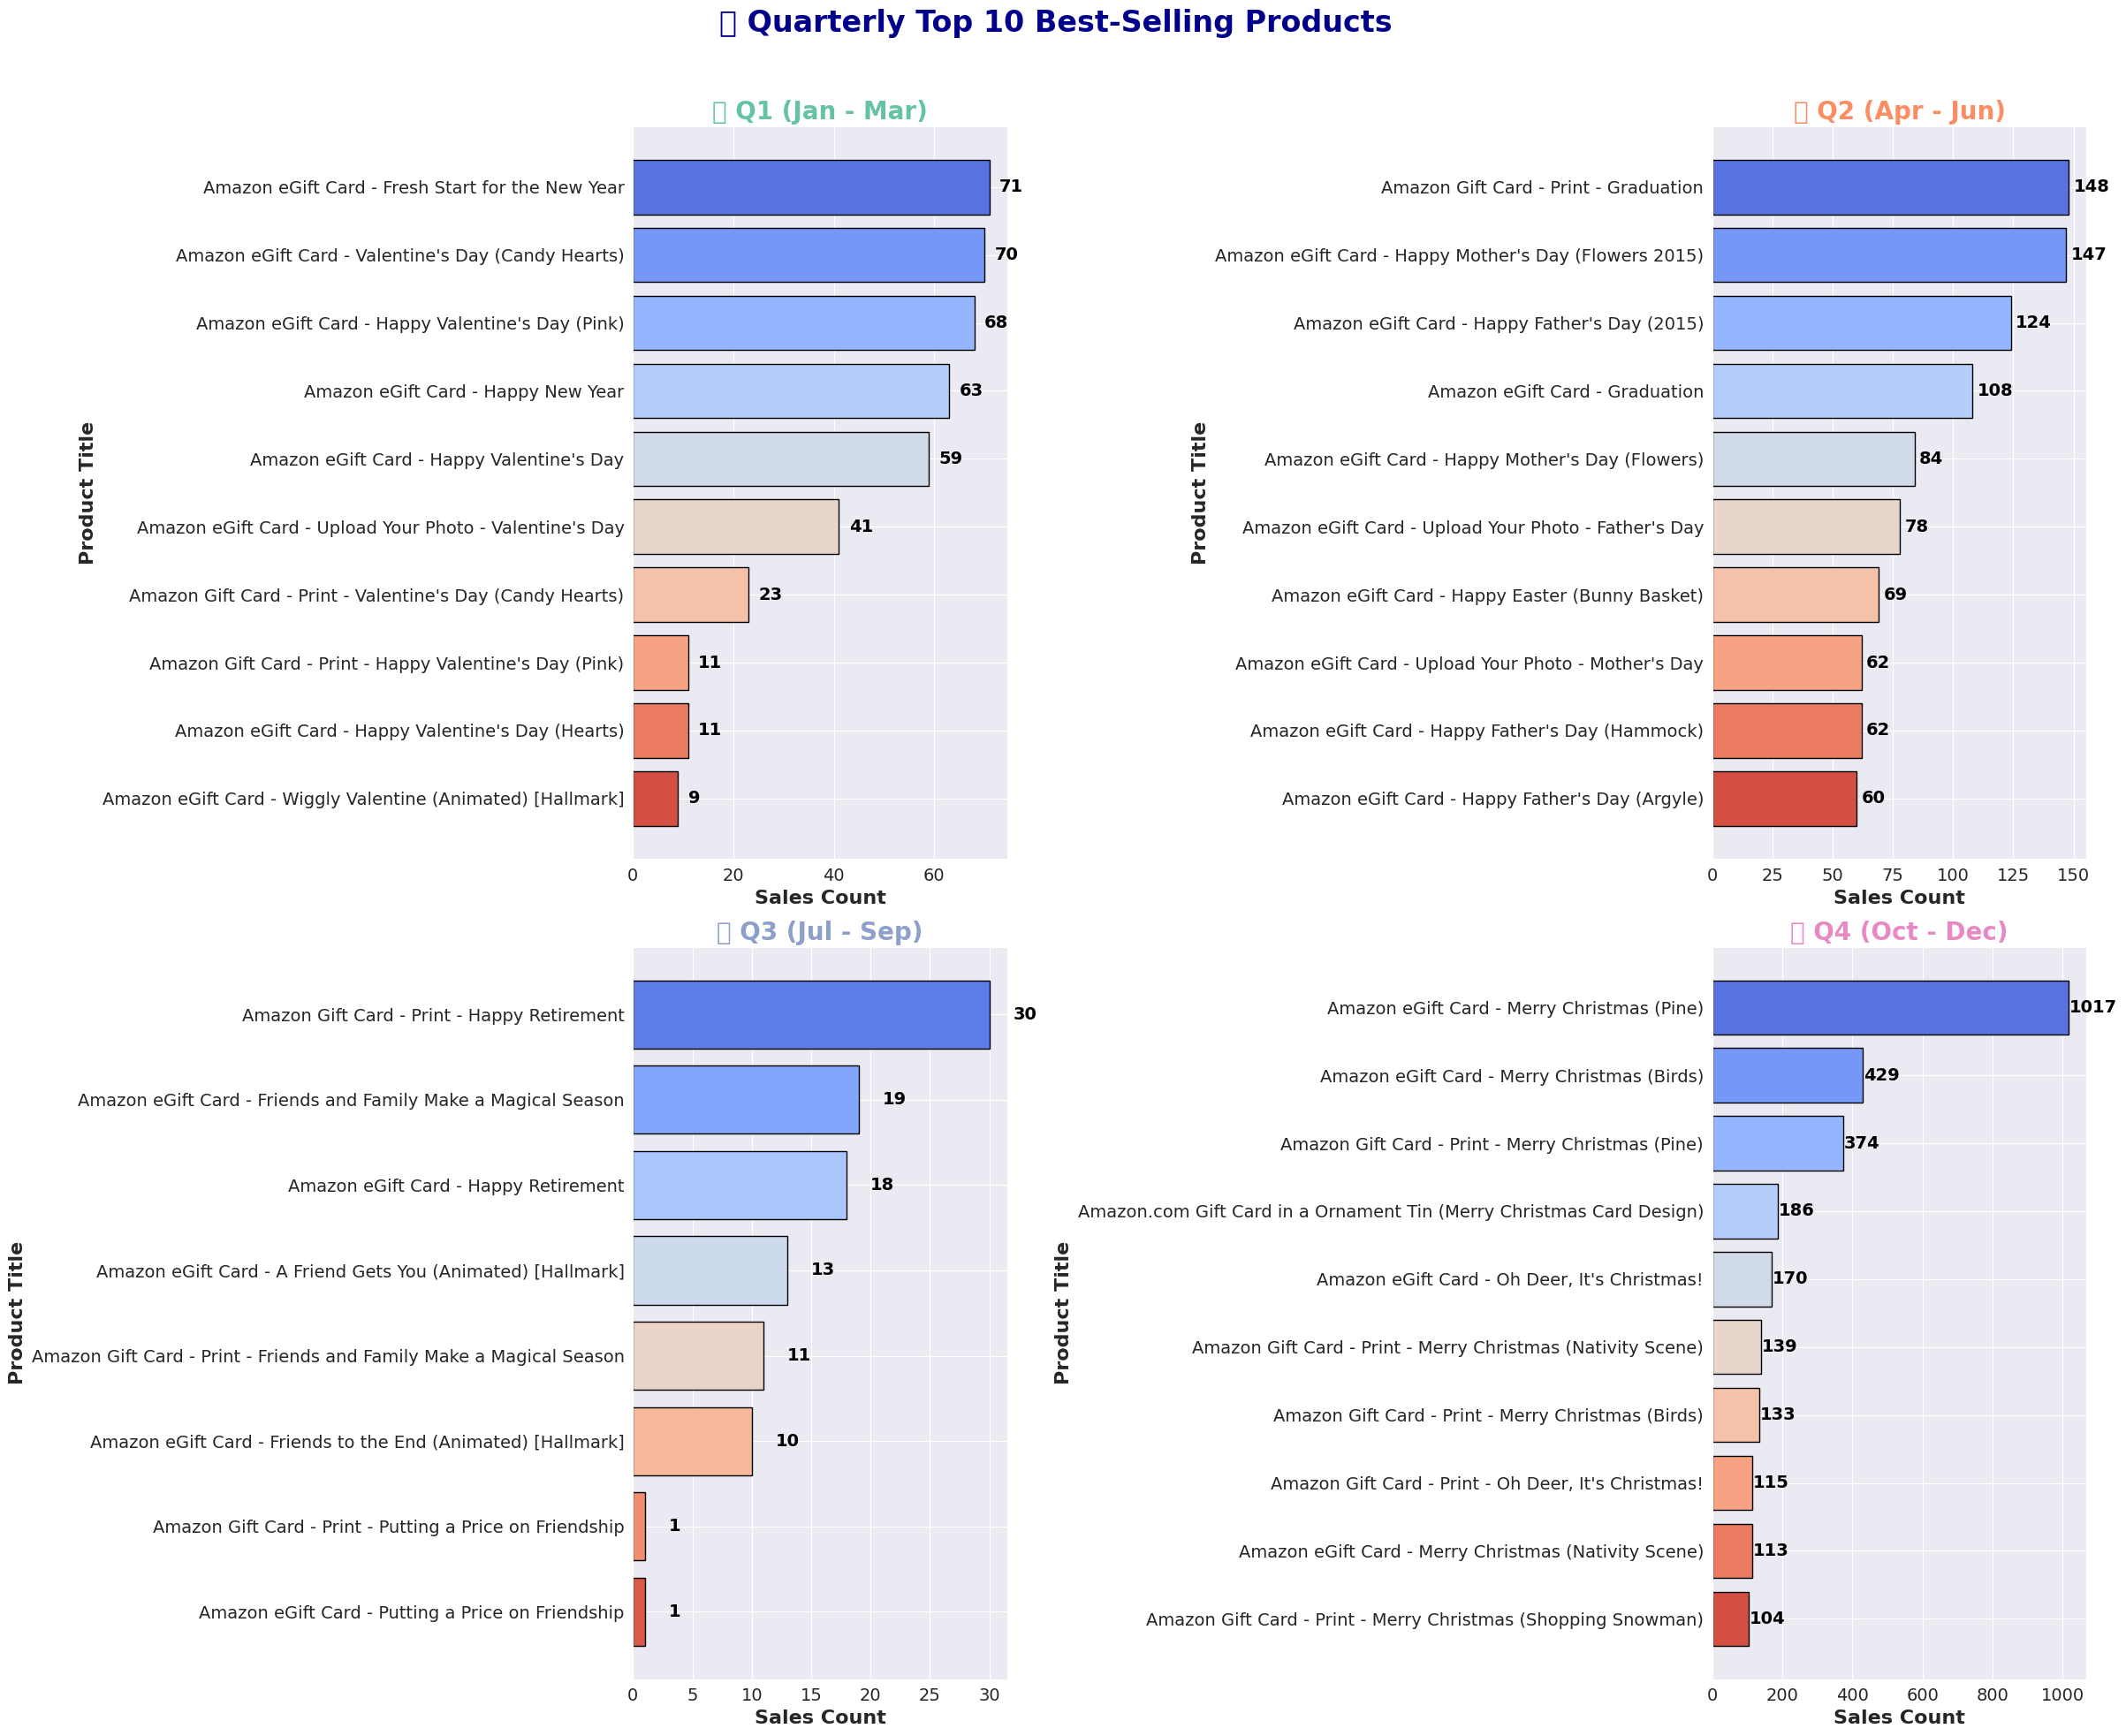

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Define month-wise category mapping
month_category_mapping = {
    "January": ["New Year"],
    "February": ["Valentine's Day"],
    "March": ["Women's Day"],
    "April": ["Easter"],
    "May": ["Mother's Day"],
    "June": ["Father's Day", "Graduation"],
    "July": ["Independence Day"],
    "August": ["Friendship"],
    "September": ["Retirement"],
    "October": ["Halloween"],
    "November": ["Thanksgiving"],
    "December": ["Christmas"]
}

# Assign months based on category
df["month"] = df["category"].map({cat: month for month, cats in month_category_mapping.items() for cat in cats})

# Define quarter-wise mapping
quarter_mapping = {
    "Q1 (Jan - Mar)": ["January", "February", "March"],
    "Q2 (Apr - Jun)": ["April", "May", "June"],
    "Q3 (Jul - Sep)": ["July", "August", "September"],
    "Q4 (Oct - Dec)": ["October", "November", "December"]
}

# Assign quarters based on months
df["quarter"] = df["month"].map({month: quarter for quarter, months in quarter_mapping.items() for month in months})

# Define quarter order
quarters = list(quarter_mapping.keys())

# Set up modern Seaborn styling
sns.set_style("darkgrid")

# Define a color palette for quarters
quarter_colors = sns.color_palette("Set2", 4)

# Create a larger figure with 2 rows and 2 columns (one chart per quarter)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 20))
fig.suptitle("📊 Quarterly Top 10 Best-Selling Products", fontsize=24, fontweight="bold", color="darkblue")

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each quarter and generate its plot
for i, quarter in enumerate(quarters):
    df_quarter = df[df["quarter"] == quarter]

    if df_quarter.empty:
        axes[i].text(0.5, 0.5, "No Data Available", ha="center", va="center", fontsize=14, color="red", fontweight="bold")
        axes[i].set_title(f"{quarter}", fontsize=18, fontweight="bold", color=quarter_colors[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        continue

    # Count occurrences of each product
    product_sales = df_quarter["product_title"].value_counts().reset_index()
    product_sales.columns = ["product_title", "sales_count"]

    # Select top 10 best sellers
    top_10_products = product_sales.head(10)

    # Choose color gradient
    colors = sns.color_palette("coolwarm", len(top_10_products))

    # Create horizontal bar chart using Seaborn
    bars = axes[i].barh(top_10_products["product_title"], top_10_products["sales_count"], color=colors, edgecolor="black")

    # Title styling
    axes[i].set_title(f"📆 {quarter}", fontsize=20, fontweight="bold", color=quarter_colors[i])

    # Labels and ticks
    axes[i].set_xlabel("Sales Count", fontsize=16, fontweight="bold")
    axes[i].set_ylabel("Product Title", fontsize=16, fontweight="bold")
    axes[i].tick_params(axis="both", labelsize=14)

    # Invert y-axis for better readability
    axes[i].invert_yaxis()

    # Annotate bars with sales count
    for bar, count in zip(bars, top_10_products["sales_count"]):
        axes[i].text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
                     f"{count}", va="center", fontsize=14, color="black", fontweight="bold")

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()

In [ ]:
print(df.columns)

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'category'],
      dtype='object')


In [ ]:
#eND

#Compare verified_purchase and star_rating

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Check if 'verified_purchase' column exists
if "verified_purchase" not in df.columns:
    print("Error: 'verified_purchase' column not found in dataset!")
else:
    # Count the total number of verified purchases
    total_verified = df[df["verified_purchase"] == "Y"].shape[0]  # Count rows where verified_purchase is "Y"

    # Display result
    print(f"Total Verified Purchases: {total_verified}")

Total Verified Purchases: 74126


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Check if 'verified_purchase' column exists
if "verified_purchase" not in df.columns:
    print("Error: 'verified_purchase' column not found in dataset!")
else:
    # Count occurrences of each category in 'verified_purchase'
    verified_counts = df["verified_purchase"].value_counts()

    # Display categorized counts
    print("Categorized Verified Purchases:\n")
    print(verified_counts)

Categorized Verified Purchases:

verified_purchase
Y    74126
N     2882
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Check if 'star_rating' column exists
if "star_rating" not in df.columns:
    print("Error: 'star_rating' column not found in dataset!")
else:
    # Count occurrences of each star rating
    star_counts = df["star_rating"].value_counts().sort_index()

    # Display categorized counts
    print("Categorized Star Ratings:\n")
    print(star_counts)

Categorized Star Ratings:

star_rating
1     2154
2      586
3     1360
4     4667
5    68241
Name: count, dtype: int64


In [ ]:
# prompt: total count of staring_ratig

import pandas as pd
# Load dataset
file_path = "/content/updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Check if 'star_rating' column exists
if "star_rating" not in df.columns:
    print("Error: 'star_rating' column not found in dataset!")
else:
    # Count total occurrences of 'star_rating'
    total_star_ratings = df["star_rating"].count()

    # Display total count
    print(f"Total Star Ratings: {total_star_ratings}")

Total Star Ratings: 77008


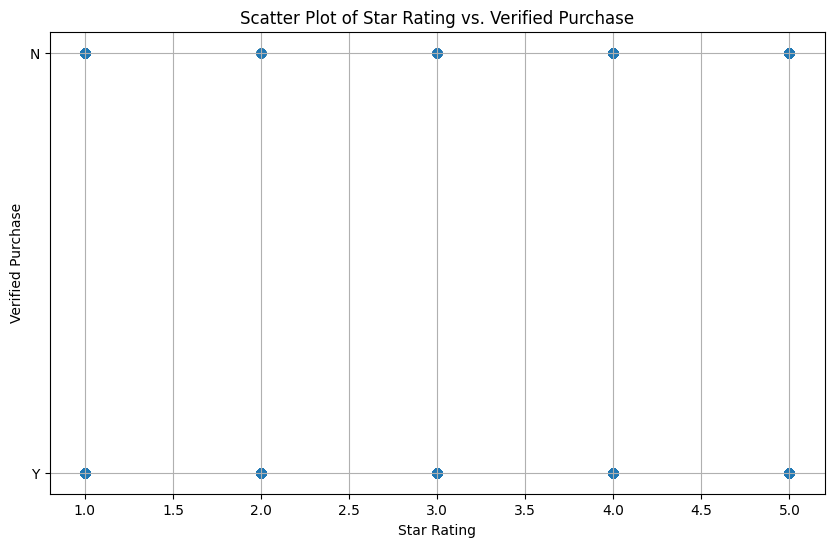

In [ ]:
# prompt: gerene scatter plot of star_rating and verifed_purchase in update+amazon_review

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_amazon_reviews.csv")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['star_rating'], df['verified_purchase'], alpha=0.5)
plt.xlabel('Star Rating')
plt.ylabel('Verified Purchase')
plt.title('Scatter Plot of Star Rating vs. Verified Purchase')
plt.grid(True)

**END**

##**Challenges**
*   Handled duplicates and missing values
*   Worked with unstructured review text
*   Extracted insights without labeled sentiment








##**Outcome**

*   Cleaned and exported the dataset
*   Performed EDA using pandas and matplotlib
*   Converted and saved a cleaned dataset for further use
*   Ready for GitHub and portfolio showcasing